# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [6]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [8]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet('/home/ritesh/UPG_MAIN/EDA/Starter-Notebook-EDA-NYC-Taxi/trip_records/2023-1.parquet')
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-01-01 00:32:10   2023-01-01 00:40:36              1.0   
1               2  2023-01-01 00:55:08   2023-01-01 01:01:27              1.0   
2               2  2023-01-01 00:25:04   2023-01-01 00:37:49              1.0   
3               1  2023-01-01 00:03:48   2023-01-01 00:13:25              0.0   
4               2  2023-01-01 00:10:29   2023-01-01 00:21:19              1.0   
...           ...                  ...                   ...              ...   
3066761         2  2023-01-31 23:58:34   2023-02-01 00:12:33              NaN   
3066762         2  2023-01-31 23:31:09   2023-01-31 23:50:36              NaN   
3066763         2  2023-01-31 23:01:05   2023-01-31 23:25:36              NaN   
3066764         2  2023-01-31 23:40:00   2023-01-31 23:53:00              NaN   
3066765         2  2023-01-31 23:07:32   2023-01-31 23:21:56              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.97         1.0                  N           161   
1                 1.10         1.0                  N            43   
2                 2.51         1.0                  N            48   
3                 1.90         1.0                  N           138   
4                 1.43         1.0                  N           107   
...                ...         ...                ...           ...   
3066761           3.05         NaN               None           107   
3066762           5.80         NaN               None           112   
3066763           4.67         NaN               None           114   
3066764           3.15         NaN               None           230   
3066765           2.85         NaN               None           262   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
0                 141             2         9.30   1.00      0.5        0.00   
1                 237             1         7.90   1.00      0.5        4.00   
2                 238             1        14.90   1.00      0.5       15.00   
3                   7             1        12.10   7.25      0.5        0.00   
4                  79             1        11.40   1.00      0.5        3.28   
...               ...           ...          ...    ...      ...         ...   
3066761            48             0        15.80   0.00      0.5        3.96   
3066762            75             0        22.43   0.00      0.5        2.64   
3066763           239             0        17.61   0.00      0.5        5.32   
3066764            79             0        18.15   0.00      0.5        4.43   
3066765           143             0        15.97   0.00      0.5        2.00   

         tolls_amount  improvement_surcharge  total_amount  \
0                 0.0                    1.0         14.30   
1                 0.0                    1.0         16.90   
2                 0.0                    1.0         34.90   
3                 0.0                    1.0         20.85   
4                 0.0                    1.0         19.68   
...               ...                    ...           ...   
3066761           0.0                    1.0         23.76   
3066762           0.0                    1.0         29.07   
3066763           0.0                    1.0         26.93   
3066764           0.0                    1.0         26.58   
3066765           0.0                    1.0         21.97   

         congestion_surcharge  airport_fee  
0                         2.5         0.00  
1                         2.5         0.00  
2                         2.5         0.00  
3                         0.0         1.25  
4                         2.5         0.00  
...                       ...          ...  
3066761                   NaN          NaN  
3066762                   NaN          NaN  
3066763                   NaN          NaN  
3066764                   N

How many rows are there?Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/home/ritesh/UPG_MAIN/EDA/Starter-Notebook-EDA-NYC-Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()
# iterate through the list of files and sample one by one:
for file_name in file_list:
    
    try:
              
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file
        df_month = pd.read_parquet(file_path)
        df_month["pickupdate"] = df_month["tpep_pickup_datetime"].dt.date # create new date column as part of dataframe
        df_month["pickuphour"] = df_month["tpep_pickup_datetime"].dt.hour # create new hour column as part of dataframe
        df_month["dropoffdate"] = df_month["tpep_dropoff_datetime"].dt.date # create new date column as part of dataframe
        df_month["dropoffhour"] = df_month["tpep_dropoff_datetime"].dt.hour # create new hour column as part of dataframe
        # Create list of all unique dates
        unique_date_list = df_month["pickupdate"].unique().tolist()
        
        # Loop through dates
        for mydate in unique_date_list:
            # Sample 5% of the hourly data randomly
            df_group = df_month[df_month["pickupdate"]== mydate].groupby("pickuphour").sample(frac = 0.05,random_state = 42)
            # Concatenate the sampled data of all the dates to a single dataframe
            df = pd.concat([df,df_group])
            
      
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
2993348         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
2992981         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
2993370         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
2993316         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
2993085         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   
...                ...         ...                ...           ...   
2993348          19.38         2.0                  N           132   
2992981           3.95         1.0                  Y            90   
2993370           1.44         1.0                  N           186   
2993316           5.96         1.0                  N           237   
2993085           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
1788               50             1  ...          0.00                    1.0   
3196699            61             0  ...          0.00                    1.0   
1408              161             1  ...          0.00                    1.0   
3196663           144             0  ...          0.00                    1.0   
3613               68             1  ...          0.00                    1.0   
...               ...           ...  ...           ...                    ...   
2993348           262             1  ...          6.55                    1.0   
2992981           262             1  ...          0.00                    1.0   
2993370           142             1  ...          0.00                    1.0   
2993316           247             1  ...          0.00                    1.0   
2993085           264             1  ...          0.00                    1.0   

         total_amount  congestion_surcharge  Airport_fee  pickupdate  \
1788            33.96                   2.5          0.0  2023-12-01   
3196699         29.43                   NaN          NaN  2023-12-01   
1408            18.84                   2.5          0.0  2023-12-01   
3196663         21.22                   NaN          NaN  2023-12-01   
3613            10.10                   2.5          0.0  2023-12-01   
...               ...                   ...          ...         ...   
2993348         96.60                   2.5          NaN  2023-01-31   
2992981         28.08                   2.5          NaN  2023-01-31   
2993370         19.62                   2.5          NaN  2023-01-31   
2993316         41.52                   2.5          NaN  2023-01-31   
2993085         30.60                   2.5          NaN  2023-01-31   

         pickuphour  dropoffdate  dropoffhour airport_fee  
1788              0   2023-12-01            0         NaN  
3196699           0   2023-12-01            1         NaN  
1408              0   2023-12-01            0         NaN  
3196663           0   2023-12-01            0         NaN  
3613              0   2023-12-01            0

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [14]:
# Store the df in csv/parquet
df.to_parquet('/home/ritesh/UPG_MAIN/EDA/Starter-Notebook-EDA-NYC-Taxi/2023.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [16]:
# Load the new data file
df = pd.read_parquet('/home/ritesh/UPG_MAIN/EDA/Starter-Notebook-EDA-NYC-Taxi/2023.parquet')

## remove any rows where year is not 2023
df= df[df["tpep_pickup_datetime"].dt.year == 2023]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
2993348         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
2992981         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
2993370         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
2993316         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
2993085         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   
...                ...         ...                ...           ...   
2993348          19.38         2.0                  N           132   
2992981           3.95         1.0                  Y            90   
2993370           1.44         1.0                  N           186   
2993316           5.96         1.0                  N           237   
2993085           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
1788               50             1  ...          0.00                    1.0   
3196699            61             0  ...          0.00                    1.0   
1408              161             1  ...          0.00                    1.0   
3196663           144             0  ...          0.00                    1.0   
3613               68             1  ...          0.00                    1.0   
...               ...           ...  ...           ...                    ...   
2993348           262             1  ...          6.55                    1.0   
2992981           262             1  ...          0.00                    1.0   
2993370           142             1  ...          0.00                    1.0   
2993316           247             1  ...          0.00                    1.0   
2993085           264             1  ...          0.00                    1.0   

         total_amount  congestion_surcharge  Airport_fee  pickupdate  \
1788            33.96                   2.5          0.0  2023-12-01   
3196699         29.43                   NaN          NaN  2023-12-01   
1408            18.84                   2.5          0.0  2023-12-01   
3196663         21.22                   NaN          NaN  2023-12-01   
3613            10.10                   2.5          0.0  2023-12-01   
...               ...                   ...          ...         ...   
2993348         96.60                   2.5          NaN  2023-01-31   
2992981         28.08                   2.5          NaN  2023-01-31   
2993370         19.62                   2.5          NaN  2023-01-31   
2993316         41.52                   2.5          NaN  2023-01-31   
2993085         30.60                   2.5          NaN  2023-01-31   

         pickuphour  dropoffdate  dropoffhour airport_fee  
1788              0   2023-12-01            0         NaN  
3196699           0   2023-12-01            1         NaN  
1408              0   2023-12-01            0         NaN  
3196663           0   2023-12-01            0         NaN  
3613              0   2023-12-01            0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896399 entries, 1788 to 2993085
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [22]:
# Fix the index and drop any columns that are not needed

## Reset the index after for new data set

#df.reset_index(inplace=True) #### this needs to be executed and then commented
df

## dropping the columns not needed

#df.drop(['index'], inplace=True, axis=1)  ### this needs to be executed and then commented
df


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896394         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
1896395         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
1896396         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
1896397         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
1896398         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 4.79         NaN               None           231   
2                 1.05         1.0                  N           161   
3                 2.08         NaN               None           137   
4                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896394          19.38         2.0                  N           132   
1896395           3.95         1.0                  Y            90   
1896396           1.44         1.0                  N           186   
1896397           5.96         1.0                  N           237   
1896398           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tolls_amount  improvement_surcharge  \
0                  50             1  ...          0.00                    1.0   
1                  61             0  ...          0.00                    1.0   
2                 161             1  ...          0.00                    1.0   
3                 144             0  ...          0.00                    1.0   
4                  68             1  ...          0.00                    1.0   
...               ...           ...  ...           ...                    ...   
1896394           262             1  ...          6.55                    1.0   
1896395           262             1  ...          0.00                    1.0   
1896396           142             1  ...          0.00                    1.0   
1896397           247             1  ...          0.00                    1.0   
1896398           264             1  ...          0.00                    1.0   

         total_amount  congestion_surcharge  Airport_fee  pickupdate  \
0               33.96                   2.5          0.0  2023-12-01   
1               29.43                   NaN          NaN  2023-12-01   
2               18.84                   2.5          0.0  2023-12-01   
3               21.22                   NaN          NaN  2023-12-01   
4               10.10                   2.5          0.0  2023-12-01   
...               ...                   ...          ...         ...   
1896394         96.60                   2.5          NaN  2023-01-31   
1896395         28.08                   2.5          NaN  2023-01-31   
1896396         19.62                   2.5          NaN  2023-01-31   
1896397         41.52                   2.5          NaN  2023-01-31   
1896398         30.60                   2.5          NaN  2023-01-31   

         pickuphour  dropoffdate  dropoffhour airport_fee  
0                 0   2023-12-01            0         NaN  
1                 0   2023-12-01            1         NaN  
2                 0   2023-12-01            0         NaN  
3                 0   2023-12-01            0         NaN  
4                 0   2023-12-01            0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [25]:
# Combine the two airport fee columns

## Since this Airpot fee is applicable for only 2 Airports and will always be 1.25 USD so we can create new Column with same name
## and put values to it which would either be 1.25 or else can be put to 0.00 

#df['Airport_fee'] = df.apply(lambda x: 1.25 if (x["airport_fee"] == 1.25 or x["Airport_fee"] == 1.25) else 0.00,axis=1)

## Droping the airport_fee column as it is not required
#df.drop(['airport_fee'], inplace=True, axis=1)
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896394         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
1896395         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
1896396         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
1896397         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
1896398         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 4.79         NaN               None           231   
2                 1.05         1.0                  N           161   
3                 2.08         NaN               None           137   
4                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896394          19.38         2.0                  N           132   
1896395           3.95         1.0                  Y            90   
1896396           1.44         1.0                  N           186   
1896397           5.96         1.0                  N           237   
1896398           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                  50             1  ...        5.66          0.00   
1                  61             0  ...        3.00          0.00   
2                 161             1  ...        3.14          0.00   
3                 144             0  ...        0.00          0.00   
4                  68             1  ...        0.00          0.00   
...               ...           ...  ...         ...           ...   
1896394           262             1  ...       14.80          6.55   
1896395           262             1  ...        4.68          0.00   
1896396           142             1  ...        3.92          0.00   
1896397           247             1  ...        6.92          0.00   
1896398           264             1  ...        5.10          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.96                   2.5   
1                          1.0         29.43                   NaN   
2                          1.0         18.84                   2.5   
3                          1.0         21.22                   NaN   
4                          1.0         10.10                   2.5   
...                        ...           ...                   ...   
1896394                    1.0         96.60                   2.5   
1896395                    1.0         28.08                   2.5   
1896396                    1.0         19.62                   2.5   
1896397                    1.0         41.52                   2.5   
1896398                    1.0         30.60                   2.5   

         Airport_fee  pickupdate  pickuphour  dropoffdate dropoffhour  
0               0.00  2023-12-01           0   2023-12-01           0  
1               0.00  2023-12-01           0   2023-12-01           1  
2               0.00  2023-12-01           0   2023-12-01           0  
3               0.00  2023-12-01           0   2023-12-01           0  
4               0.00  2023-12-01           0   2023-12-01           0  
...              ...         ...         ...          ...         ...

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [27]:
# check where values of fare amount are negative

## checking if fair amount is negative

df[df["fare_amount"] < 0] ## no records found

## checking negative value for the total amount changed for passenger

df[df["total_amount"] < 0 ] ## 91 records found which could mean that these trips never got completed due to some reason.

## checking negative values for other monetary columns as well

df[df["mta_tax"] < 0 ] ## 87 records found
df[df["tolls_amount"] < 0 ] ## 0 records
df[df["improvement_surcharge"] < 0 ] ## 91 records
df[df["congestion_surcharge"] < 0 ]  ## 70 records
df[df["extra"] < 0 ] ## 3 records




VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
281020          2  2023-10-21 13:26:05   2023-10-21 13:26:19              1.0   
317576          2  2023-10-27 19:23:55   2023-10-27 19:26:51              2.0   
1145346         2  2023-11-08 18:27:30   2023-11-08 18:27:57              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
281020            0.01         1.0                  N            79   
317576            2.02         2.0                  N           132   
1145346           0.03         1.0                  N           249   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
281020             79             2  ...         0.0           0.0   
317576            132             4  ...         0.0           0.0   
1145346           249             4  ...         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
281020                     1.0          7.00                   2.5   
317576                    -1.0         -8.25                   0.0   
1145346                   -1.0         -6.50                  -2.5   

         Airport_fee  pickupdate  pickuphour  dropoffdate dropoffhour  
281020           0.0  2023-10-21          13   2023-10-21          13  
317576           0.0  2023-10-27          19   2023-10-27          19  
1145346          0.0  2023-11-08          18   2023-11-08          18  

[3 rows x 23 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

## RatecodeID is either 1 or 2 for the negative total amount which means either it was for Standard Rate or JFK international Airport trip rate


In [27]:
# Find which columns have negative values

##mta_tax, congestion_surcharge,improvement_surcharge, total_amount



In [ ]:
# fix these negative values
## Overall there are 91 records where total_amount to be paid by Customer is coming as negative. One way could be to delete all
## these records as number is very less ,but at the same time we may loose the insights
## which can tell us the reason for such pattern even though it is very less in count so there is no harm in keeping these negative values





### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [29]:
# Find the proportion of missing values in each column

df.isnull().sum() * 100 /len(df)



VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.445425
trip_distance            0.000000
RatecodeID               3.445425
store_and_fwd_flag       3.445425
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.445425
Airport_fee              0.000000
pickupdate               0.000000
pickuphour               0.000000
dropoffdate              0.000000
dropoffhour              0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [31]:
# Display the rows with null values

## check the rows with null values
df[df["passenger_count"].isnull()]
## find median of the column
df["passenger_count"].median()

# Impute NaN values in 'passenger_count'
## it would be fair call to replace the null values of this column with median
df["passenger_count"] = df["passenger_count"].fillna((df["passenger_count"].median()))




Did you find zeroes in passenger_count? YES Handle these.


In [33]:
## Handling zeros in the passenger count
## checking for records where total amount and passenger count is 0
df[(df["passenger_count"] == 0.0) & (df["total_amount"] <= 0)] ## 13 records found where total amount and passenger count is 0 
## Replace all the values where passenger count is 0 with median
median = df["passenger_count"].median()
df["passenger_count"] = df["passenger_count"].apply(lambda x: median if x == 0.0 else x)




**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [35]:
# Fix missing values in 'RatecodeID'

## get the median for the column
median_RatecodeID = df["RatecodeID"].median()
## Replace missing values with median
df["RatecodeID"] = df["RatecodeID"].fillna((median_RatecodeID))



**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [37]:
# handle null values in congestion_surcharge
df["congestion_surcharge"].value_counts()
# since values are categorical in nature so null values needs to be removed by median
## get the median for the column
median_congestion_surcharge = df["congestion_surcharge"].median()
## Replace missing values with median
df["congestion_surcharge"] = df["congestion_surcharge"].fillna((median_congestion_surcharge))

df




VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
1               2  2023-12-01 00:38:48   2023-12-01 01:01:55              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3               2  2023-12-01 00:00:50   2023-12-01 00:14:37              1.0   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
...           ...                  ...                   ...              ...   
1896394         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
1896395         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
1896396         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
1896397         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
1896398         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
1                 4.79         1.0               None           231   
2                 1.05         1.0                  N           161   
3                 2.08         1.0               None           137   
4                 0.40         1.0                  N            68   
...                ...         ...                ...           ...   
1896394          19.38         2.0                  N           132   
1896395           3.95         1.0                  Y            90   
1896396           1.44         1.0                  N           186   
1896397           5.96         1.0                  N           237   
1896398           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                  50             1  ...        5.66          0.00   
1                  61             0  ...        3.00          0.00   
2                 161             1  ...        3.14          0.00   
3                 144             0  ...        0.00          0.00   
4                  68             1  ...        0.00          0.00   
...               ...           ...  ...         ...           ...   
1896394           262             1  ...       14.80          6.55   
1896395           262             1  ...        4.68          0.00   
1896396           142             1  ...        3.92          0.00   
1896397           247             1  ...        6.92          0.00   
1896398           264             1  ...        5.10          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.96                   2.5   
1                          1.0         29.43                   2.5   
2                          1.0         18.84                   2.5   
3                          1.0         21.22                   2.5   
4                          1.0         10.10                   2.5   
...                        ...           ...                   ...   
1896394                    1.0         96.60                   2.5   
1896395                    1.0         28.08                   2.5   
1896396                    1.0         19.62                   2.5   
1896397                    1.0         41.52                   2.5   
1896398                    1.0         30.60                   2.5   

         Airport_fee  pickupdate  pickuphour  dropoffdate dropoffhour  
0               0.00  2023-12-01           0   2023-12-01           0  
1               0.00  2023-12-01           0   2023-12-01           1  
2               0.00  2023-12-01           0   2023-12-01           0  
3               0.00  2023-12-01           0   2023-12-01           0  
4               0.00  2023-12-01           0   2023-12-01           0  
...              ...         ...         ...          ...         ...

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values

## Handling null values for store_and_fwd_flag column

df[df["store_and_fwd_flag"].isnull()]
df["store_and_fwd_flag"].value_counts()

## Replacing null values with the categorical value which has higher frequency

df["store_and_fwd_flag"] = df["store_and_fwd_flag"].fillna((('N')))
df[df["store_and_fwd_flag"].isnull()]




Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, pickupdate, pickuphour, dropoffdate, dropoffhour]
Index: []

[0 rows x 23 columns]

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [41]:
# Describe the data and check if there are any potential outliers present

df.describe()
# Check for potential out of place values in various columns
## passenger count, RatecodeID, payment type, extra, tolls amount are some columns where max is quite high 


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896399e+06                     1896399                     1896399   
mean   1.736471e+00  2023-07-02 20:00:00.422389  2023-07-02 20:17:28.969309   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00         2023-04-02 16:10:06         2023-04-02 16:28:53   
50%    2.000000e+00         2023-06-27 15:44:30         2023-06-27 16:07:49   
75%    2.000000e+00         2023-10-06 19:40:53  2023-10-06 19:57:44.500000   
max    6.000000e+00         2023-12-31 23:59:58         2024-01-01 18:55:59   
std    4.457472e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896399e+06   1.896399e+06  1.896399e+06  1.896399e+06   
mean      1.371888e+00   3.913147e+00  1.620797e+00  1.652576e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.936152e+05  9.900000e+01  2.650000e+02   
std       8.628767e-01   1.921379e+02  7.314345e+00  6.396625e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06   
mean   1.640040e+02  1.162656e+00  1.988264e+01  1.580384e+00  4.951812e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00 -5.000000e+00 -5.000000e-01   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.205000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  2.320110e+03  5.168000e+01  3.500000e+00   
std    6.987953e+01  5.077549e-01  1.836082e+01  1.826963e+00  4.929021e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896399e+06  1.896399e+06           1.896399e+06  1.896399e+06   
mean   3.555242e+00  5.999546e-01           9.990026e-01  2.895934e+01   
min    0.000000e+00  0.000000e+00          -1.000000e+00 -8.250000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    4.775000e+02  9.275000e+01           1.000000e+00  2.372790e+03   
std    4.072892e+00  2.193255e+00           3.094914e-02  2.292708e+01   

       congestion_surcharge   Airport_fee    pickuphour   dropoffhour  
count          1.896399e+06  1.896399e+06  1.896399e+06  1.896399e+06  
mean           2.315802e+00  2.620954e-02  1.426504e+01  1.431082e+01  
min           -2.500000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  1.100000e+01  1.100000e+01  
50%            2.500000e+00  0.000000e+00  1.500000e+01  1.500000e+01  
75%            2.500000e+00  0.000000e+00  1.900000e+01  1.900000e+01  
max            2.500000e+00  1.250000e+00  2.300000e+01  2.300000e+01  
std            6.534732e-01  1.790950e-01  5.807379e+00  5.921584e+00

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [43]:
# removing 7+ passenger counts
df = df[~(df["passenger_count"] > 7)]


In [45]:
## trip distance is nearly 0 and fare amount is more than 300 

## let us remove these records as count is 33 records it has some discrepency
df = df[~((df["trip_distance"] == 0.0) & (df["fare_amount"] > 300))]
df
df = df[~(df["payment_type"] == 0)]
df

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
4               2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   
5               2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6               2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
...           ...                  ...                   ...              ...   
1896394         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
1896395         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
1896396         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
1896397         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
1896398         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
2                 1.05         1.0                  N           161   
4                 0.40         1.0                  N            68   
5                 1.66         1.0                  N           114   
6                 2.45         1.0                  N           164   
...                ...         ...                ...           ...   
1896394          19.38         2.0                  N           132   
1896395           3.95         1.0                  Y            90   
1896396           1.44         1.0                  N           186   
1896397           5.96         1.0                  N           237   
1896398           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
0                  50             1  ...        5.66          0.00   
2                 161             1  ...        3.14          0.00   
4                  68             1  ...        0.00          0.00   
5                 186             1  ...        3.14          0.00   
6                 232             1  ...        1.00          0.00   
...               ...           ...  ...         ...           ...   
1896394           262             1  ...       14.80          6.55   
1896395           262             1  ...        4.68          0.00   
1896396           142             1  ...        3.92          0.00   
1896397           247             1  ...        6.92          0.00   
1896398           264             1  ...        5.10          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         33.96                   2.5   
2                          1.0         18.84                   2.5   
4                          1.0         10.10                   2.5   
5                          1.0         18.84                   2.5   
6                          1.0         20.90                   2.5   
...                        ...           ...                   ...   
1896394                    1.0         96.60                   2.5   
1896395                    1.0         28.08                   2.5   
1896396                    1.0         19.62                   2.5   
1896397                    1.0         41.52                   2.5   
1896398                    1.0         30.60                   2.5   

         Airport_fee  pickupdate  pickuphour  dropoffdate dropoffhour  
0               0.00  2023-12-01           0   2023-12-01           0  
2               0.00  2023-12-01           0   2023-12-01           0  
4               0.00  2023-12-01           0   2023-12-01           0  
5               0.00  2023-12-01           0   2023-12-01           1  
6               0.00  2023-12-01           0   2023-12-01           0  
...              ...         ...         ...          ...         ...

In [47]:
# Continue with outlier handling

# checking for the records where trip distance and fair amount is 0 but pickup and drop location is different
df_test = df[(df["trip_distance"] == 0.0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])] 
df_test  ## 64 records found

## let us remove these records as count is less it has some discrepency
df = df[~((df["trip_distance"] == 0.0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))] 
df

# checking for the records where trip distance is greater than 250 miles
df_test = df[(df["trip_distance"] > 250)] 
df_test ## 43 records found

## let us remove these records as count is less it has some discrepency
df = df[~((df["trip_distance"] > 250))] 
df

## RatecodeID 99 does not exist as part of data dictionary
## checking for the records where RatecodeID is 99

df_test = df[(df["RatecodeID"] == 99)] 
df_test ## 10601 records found

## let us remove these records as it has some discrepency

df = df[~((df["RatecodeID"] == 99))]
df

## tolls amount max value looks quite hihger
## checking for records where tolls price is greater than 7

df["tolls_amount"].value_counts()

df_test = df[(df["tolls_amount"] > 7)] 
df_test ## 10601 records found

## let us remove these records as it looks outlier
df = df[~(df["tolls_amount"] > 7)] 
df

## checking for total amount paid by Customer for negative value as it may affect the trend overall
df_test = df[(df["total_amount"] < 0)] 
df_test ## 90 records found

## let us remove these records
df = df[~(df["total_amount"] < 0)] 
df

df.describe()


VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.810180e+06                     1810180                     1810180   
mean   1.744090e+00  2023-07-01 18:58:46.817741  2023-07-01 19:15:54.122071   
min    1.000000e+00         2023-01-01 00:00:57         2023-01-01 00:09:35   
25%    1.000000e+00  2023-04-01 18:28:55.500000  2023-04-01 18:42:35.750000   
50%    2.000000e+00         2023-06-25 22:48:21  2023-06-25 23:05:22.500000   
75%    2.000000e+00  2023-10-05 18:37:49.500000  2023-10-05 18:56:42.500000   
max    2.000000e+00         2023-12-31 23:59:58         2024-01-01 18:55:59   
std    4.363719e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.810180e+06   1.810180e+06  1.810180e+06  1.810180e+06   
mean      1.386052e+00   3.354373e+00  1.065525e+00  1.656914e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.770000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.300000e+00  1.000000e+00  2.340000e+02   
max       7.000000e+00   2.295500e+02  5.000000e+00  2.650000e+02   
std       8.761618e-01   4.364810e+00  3.647296e-01  6.350204e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.810180e+06  1.810180e+06  1.810180e+06  1.810180e+06  1.810180e+06   
mean   1.648001e+02  1.205135e+00  1.930162e+01  1.643066e+00  4.972180e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00 -2.500000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.120000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  2.320110e+03  5.168000e+01  3.500000e+00   
std    6.923240e+01  4.665834e-01  1.731169e+01  1.834042e+00  3.736866e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.810180e+06  1.810180e+06           1.810180e+06  1.810180e+06   
mean   3.547564e+00  5.036670e-01           9.993828e-01  2.834071e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.595000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.030000e+01   
max    4.775000e+02  7.000000e+00           1.000000e+00  2.372790e+03   
std    3.932468e+00  1.765802e+00           2.302083e-02  2.162833e+01   

       congestion_surcharge   Airport_fee    pickuphour   dropoffhour  
count          1.810180e+06  1.810180e+06  1.810180e+06  1.810180e+06  
mean           2.332794e+00  2.707397e-02  1.432059e+01  1.436390e+01  
min            0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  0.000000e+00  1.100000e+01  1.100000e+01  
50%            2.500000e+00  0.000000e+00  1.500000e+01  1.500000e+01  
75%            2.500000e+00  0.000000e+00  1.900000e+01  1.900000e+01  
max            2.500000e+00  1.250000e+00  2.300000e+01  2.300000e+01  
std            6.245453e-01  1.819601e-01  5.782347e+00  5.898533e+00

In [ ]:
# Do any columns need standardising?
# Columns like VendorId,RatecodeID,PULocationID,DOLocationID,Airport_fee need to be standarised as other column names


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [49]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickupdate',
 'pickuphour',
 'dropoffdate',
 'dropoffhour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Categorical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

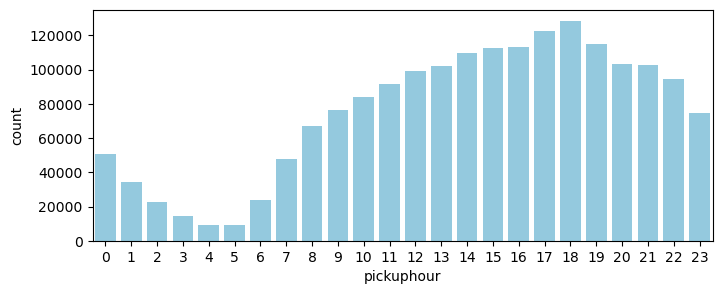

In [51]:
# Find and show the hourly trends in taxi pickups

df["pickuphour"].value_counts()
plt.figure(figsize=(8,3))
sns.countplot(x=df["pickuphour"],color='skyblue')
plt.show()



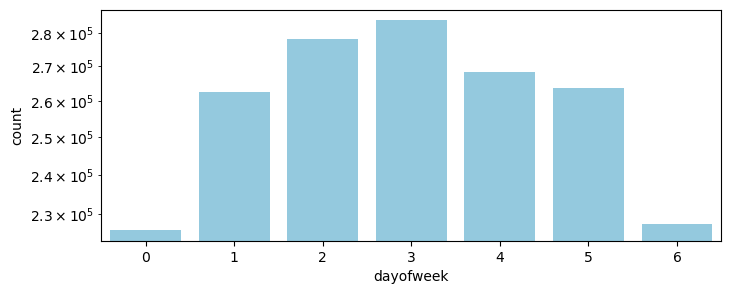

In [53]:
# Find and show the daily trends in taxi pickups (days of the week)
df["dayofweek"] = df["tpep_pickup_datetime"].dt.dayofweek
df["dayofweek"].value_counts()
plt.figure(figsize=(8,3))
g=sns.countplot(x=df["dayofweek"],color='skyblue')
g.set_yscale("log")
plt.show()



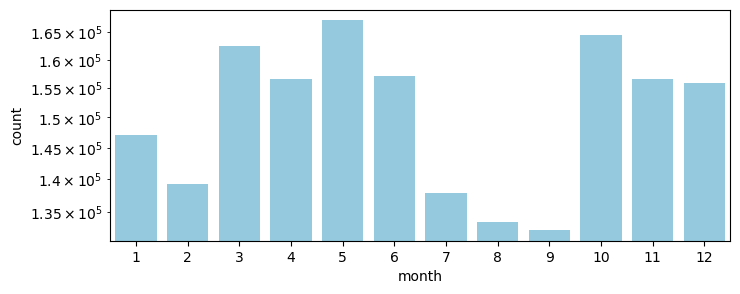

In [55]:
# Show the monthly trends in pickups
df["month"] = df["tpep_pickup_datetime"].dt.month
df["month"].value_counts()
plt.figure(figsize=(8,3))
g=sns.countplot(x=df["month"],color='skyblue')
g.set_yscale("log")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [57]:
# Analyse the above parameters

## checking for zero values
df[df["fare_amount"] == 0] ## 470 rows
df[df["tip_amount"] == 0] ## 420043 rows
df[df["total_amount"] == 0] ## 221 rows
df[df["trip_distance"] == 0] ## 35022 rows

## checking for negative values
df[df["fare_amount"] < 0] ## 0 rows
df[df["tip_amount"] < 0] ## 0 rows
df[df["total_amount"] < 0] ## 0 rows
df[df["trip_distance"] < 0] ## 0 rows






Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, pickupdate, pickuphour, dropoffdate, dropoffhour, dayofweek, month]
Index: []

[0 rows x 25 columns]

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these? Yes

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?No

In [59]:
# Create a df with non zero entries for the selected parameters.

df_copy = df.copy()
#df_copy = df_copy[~(df_copy["trip_distance"] == 0)] ### need to relook it again
df_copy = df_copy[~(df_copy["fare_amount"] == 0)]
df_copy = df_copy[~(df_copy["tip_amount"] == 0)]
df_copy = df_copy[~(df_copy["total_amount"] == 0)]
df_copy


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
2               2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
5               2  2023-12-01 00:57:08   2023-12-01 01:05:49              1.0   
6               2  2023-12-01 00:46:28   2023-12-01 00:59:29              2.0   
7               2  2023-12-01 00:36:28   2023-12-01 00:36:34              1.0   
...           ...                  ...                   ...              ...   
1896394         2  2023-01-31 23:07:44   2023-01-31 23:40:44              1.0   
1896395         2  2023-01-31 23:20:49   2023-01-31 23:34:08              1.0   
1896396         2  2023-01-31 23:04:20   2023-01-31 23:13:51              1.0   
1896397         2  2023-01-31 23:00:00   2023-01-31 23:26:13              1.0   
1896398         2  2023-01-31 23:37:47   2023-01-31 23:52:09              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 3.99         1.0                  N           148   
2                 1.05         1.0                  N           161   
5                 1.66         1.0                  N           114   
6                 2.45         1.0                  N           164   
7                 0.00         5.0                  N           170   
...                ...         ...                ...           ...   
1896394          19.38         2.0                  N           132   
1896395           3.95         1.0                  Y            90   
1896396           1.44         1.0                  N           186   
1896397           5.96         1.0                  N           237   
1896398           4.40         1.0                  N           264   

         DOLocationID  payment_type  ...  improvement_surcharge  total_amount  \
0                  50             1  ...                    1.0         33.96   
2                 161             1  ...                    1.0         18.84   
5                 186             1  ...                    1.0         18.84   
6                 232             1  ...                    1.0         20.90   
7                 170             1  ...                    1.0         17.40   
...               ...           ...  ...                    ...           ...   
1896394           262             1  ...                    1.0         96.60   
1896395           262             1  ...                    1.0         28.08   
1896396           142             1  ...                    1.0         19.62   
1896397           247             1  ...                    1.0         41.52   
1896398           264             1  ...                    1.0         30.60   

         congestion_surcharge  Airport_fee  pickupdate  pickuphour  \
0                         2.5         0.00  2023-12-01           0   
2                         2.5         0.00  2023-12-01           0   
5                         2.5         0.00  2023-12-01           0   
6                         2.5         0.00  2023-12-01           0   
7                         2.5         0.00  2023-12-01           0   
...                       ...          ...         ...         ...   
1896394                   2.5         1.25  2023-01-31          23   
1896395                   2.5         0.00  2023-01-31          23   
1896396                   2.5         0.00  2023-01-31          23   
1896397                   2.5         0.00  2023-01-31          23   
1896398                   2.5         0.00  2023-01-31          23   

         dropoffdate  dropoffhour  dayofweek month  
0         2023-12-01            0          4    12  
2         2023-12-01            0          4    12  
5         2023-12-01            1          4    12  
6         2023-12-01            0          4    12  
7         2023-12-01            0          4    12  
...              ...          ...        ...   ... 

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

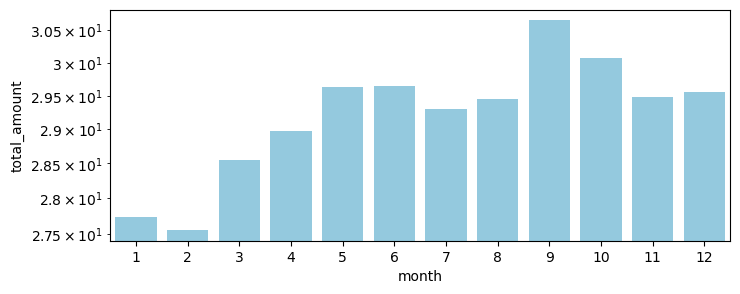

In [61]:
# Group data by month and analyse monthly revenue
plt.figure(figsize=(8,3))
g=sns.barplot(x=df_copy["month"],y=df_copy["total_amount"],color='skyblue',ci=None)
g.set_yscale("log")
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

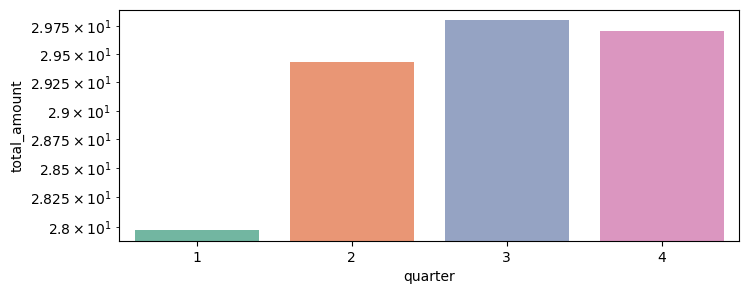

In [63]:
# Calculate proportion of each quarter
df_copy["quarter"] = df["tpep_pickup_datetime"].dt.quarter
df_copy
plt.figure(figsize=(8,3))
g=sns.barplot(x=df_copy["quarter"],y=df_copy["total_amount"],palette="Set2",ci=None)
g.set_yscale("log")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

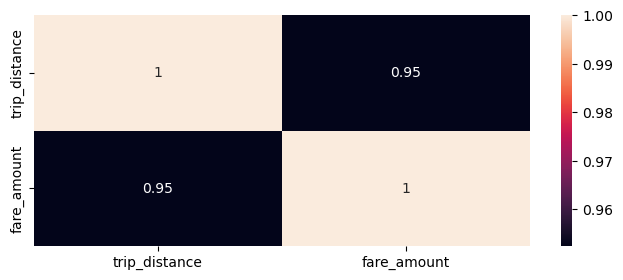

In [65]:
# Show how trip fare is affected by distance

## leaving the rows where trip_distance is zero

df_copy_nonzero = df_copy[~(df_copy["trip_distance"] == 0)]
plt.figure(figsize=(8,3))
sns.heatmap(df_copy_nonzero[["trip_distance","fare_amount"]].corr(),annot=True)
plt.show()

## 0.95 is the correlation value which shows if distance is more fare amount will be more and viceversa

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

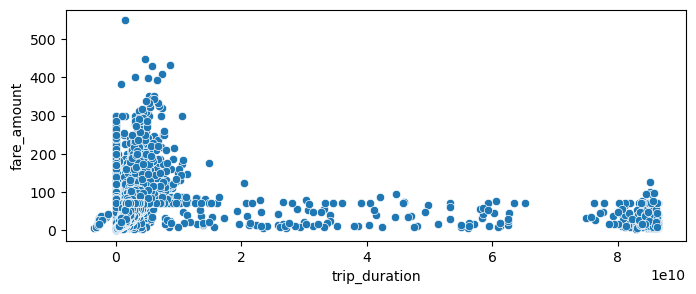

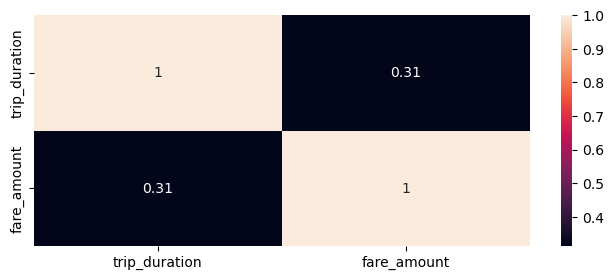

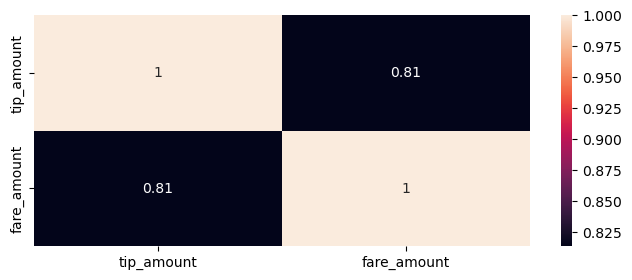

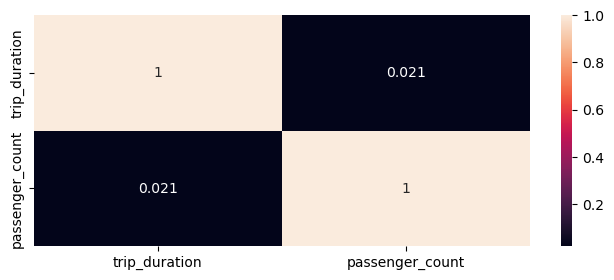

In [67]:
# Show relationship between fare and trip duration
df_copy["trip_duration"] = df_copy["tpep_dropoff_datetime"] - df_copy["tpep_pickup_datetime"]
df_copy["trip_duration"]
plt.figure(figsize=(8,3))
sns.scatterplot(x=df_copy["trip_duration"],y=df_copy["fare_amount"])
plt.show()
plt.figure(figsize=(8,3))
sns.heatmap(df_copy[["trip_duration","fare_amount"]].corr(),annot=True)
plt.show()

## Relationship between fare_amount/tips
plt.figure(figsize=(8,3))
sns.heatmap(df_copy[["tip_amount","fare_amount"]].corr(),annot=True)
plt.show()

## Relationship between fare_amount/tips
plt.figure(figsize=(8,3))
sns.heatmap(df_copy[["trip_duration","passenger_count"]].corr(),annot=True)
plt.show()

## Graphs below shows weak correlation which shows fare amount is not mostly dependent on trip duration

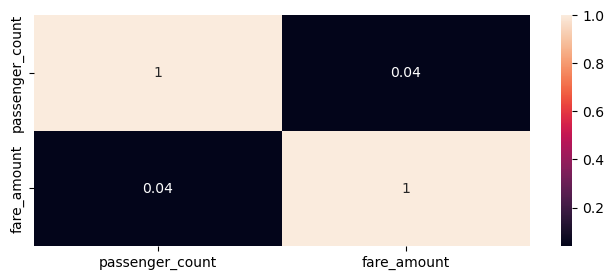

In [69]:
# Show relationship between fare and number of passengers

#plt.figure(figsize=(15,8))
plt.figure(figsize=(8,3))
sns.heatmap(df_copy[["passenger_count","fare_amount"]].corr(),annot=True)
plt.show()

## Graph below shows very weak relationship and fare amount is dependent on passenger count

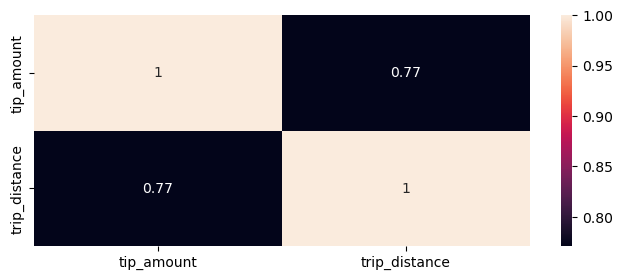

In [71]:
# Show relationship between tip and trip distance
#plt.figure(figsize=(15,8))
plt.figure(figsize=(8,3))
sns.heatmap(df_copy[["tip_amount","trip_distance"]].corr(),annot=True)
plt.show()
## Graph below shows good positive relationship which shows for longer trips tip amount will be more and viceversa

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

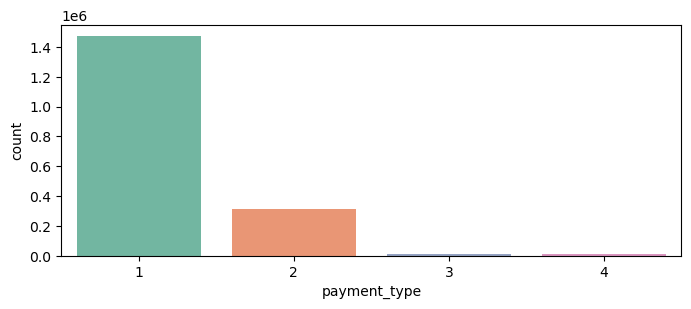

In [73]:
# Analyse the distribution of different payment types (payment_type).
plt.figure(figsize=(8,3))
sns.countplot(x=df["payment_type"],palette="Set2")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [462]:
#!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 7.4 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 9.6 MB/s eta 0:00:009.7 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:009.3 MB/s eta 0:00:01


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [75]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("/home/ritesh/UPG_MAIN/EDA/Starter-Notebook-EDA-NYC-Taxi/taxi_zones/taxi_zones.shp")
zones

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  
..             ...                                                ...  
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  

[263 rows x 7 columns]

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

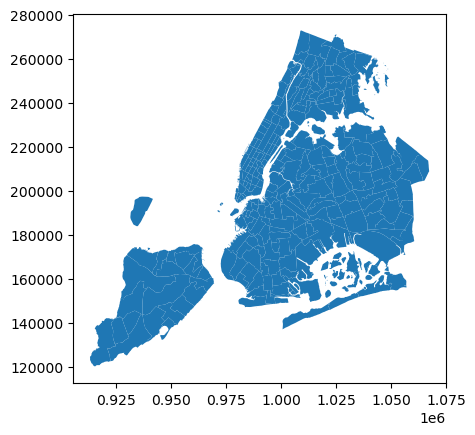

In [77]:
print(zones.info())
zones.plot()


Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [79]:
# Merge zones and trip records using locationID and PULocationID

df_merged = df_copy.merge(zones, left_on='PULocationID', right_on='LocationID',how='right')
### location ID 57, 104, 105 not present in zones DF

## deleting rows from df_merged where PULocationID is 57,104,105 as count is very less and it will be of no use after merge
df_merged = df_merged[~(df_merged["PULocationID"] == 57)] 
df_merged = df_merged[~(df_merged["PULocationID"] == 104)]
df_merged = df_merged[~(df_merged["PULocationID"] == 105)]
df_merged



VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             2.0  2023-12-02 18:58:11   2023-12-02 18:58:17              4.0   
1             2.0  2023-12-02 18:10:48   2023-12-02 18:10:54              4.0   
2             2.0  2023-12-03 05:00:44   2023-12-03 05:00:52              2.0   
3             1.0  2023-12-03 16:48:33   2023-12-03 16:50:27              1.0   
4             2.0  2023-12-03 17:43:06   2023-12-03 17:43:39              1.0   
...           ...                  ...                   ...              ...   
1401983       2.0  2023-01-31 21:50:44   2023-01-31 21:55:18              1.0   
1401984       2.0  2023-01-31 22:12:19   2023-01-31 22:21:05              2.0   
1401985       1.0  2023-01-31 22:28:21   2023-01-31 22:37:51              2.0   
1401986       2.0  2023-01-31 22:13:52   2023-01-31 22:23:40              1.0   
1401987       2.0  2023-01-31 23:25:50   2023-01-31 23:32:23              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
0                 0.00         5.0                  N           1.0   
1                 0.00         5.0                  N           1.0   
2                 0.00         5.0                  N           1.0   
3                 0.00         5.0                  N           1.0   
4                 0.00         2.0                  N           1.0   
...                ...         ...                ...           ...   
1401983           0.64         1.0                  N         263.0   
1401984           1.91         1.0                  N         263.0   
1401985           2.10         1.0                  N         263.0   
1401986           2.30         1.0                  N         263.0   
1401987           1.63         1.0                  N         263.0   

         DOLocationID  payment_type  ...  month  quarter   trip_duration  \
0                 1.0           1.0  ...   12.0      4.0 0 days 00:00:06   
1                 1.0           1.0  ...   12.0      4.0 0 days 00:00:06   
2                 1.0           1.0  ...   12.0      4.0 0 days 00:00:08   
3                 1.0           1.0  ...   12.0      4.0 0 days 00:01:54   
4                 1.0           1.0  ...   12.0      4.0 0 days 00:00:33   
...               ...           ...  ...    ...      ...             ...   
1401983         236.0           1.0  ...    1.0      1.0 0 days 00:04:34   
1401984         162.0           1.0  ...    1.0      1.0 0 days 00:08:46   
1401985         143.0           1.0  ...    1.0      1.0 0 days 00:09:30   
1401986         229.0           1.0  ...    1.0      1.0 0 days 00:09:48   
1401987         151.0           1.0  ...    1.0      1.0 0 days 00:06:33   

         OBJECTID  Shape_Leng  Shape_Area            zone  LocationID  \
0               1    0.116357    0.000782  Newark Airport           1   
1               1    0.116357    0.000782  Newark Airport           1   
2               1    0.116357    0.000782  Newark Airport           1   
3               1    0.116357    0.000782  Newark Airport           1   
4               1    0.116357    0.000782  Newark Airport           1   
...           ...         ...         ...             ...         ...   
1401983       263    0.037017    0.000066  Yorkville West         263   
1401984       263    0.037017    0.000066  Yorkville West         263   
1401985       263    0.037017    0.000066  Yorkville West         263   
1401986       263    0.037017    0.000066  Yorkville West         263   
1401987       263    0.037017    0.000066  Yorkville West         263   

           borough                                           geometry  
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
2              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
3              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
4              EWR  POLYGON ((933

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [81]:
# Group data by location and calculate the number of trips

df_trips_count = df_merged.groupby("LocationID").size()
df_trips_count


LocationID
1        113
2          1
3          1
4       1430
5          1
       ...  
259        3
260       91
261     6679
262    19308
263    27298
Length: 260, dtype: int64

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [83]:
# Merge trip counts back to the zones GeoDataFrame

trip_counts = []
for i, loc_z in zones["LocationID"].items(): 
    for loc, count in df_trips_count.items():
        if(loc_z == loc):
            trip_counts.append(count)

zones["no_of_trips"] = trip_counts
zones.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   no_of_trips  263 non-null    int64   
dtypes: float64(2), geometry(1), int32(2), int64(1), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

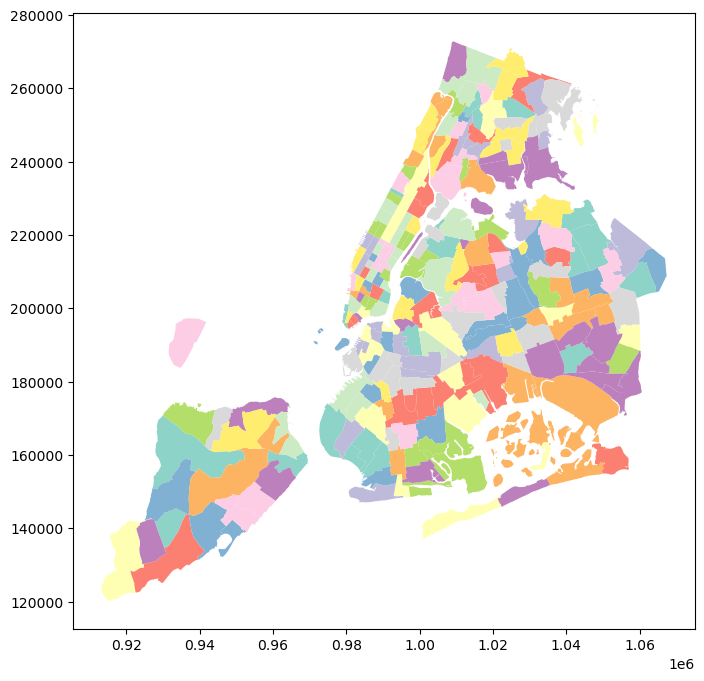

In [85]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Plot the map and display it

zones.plot(
    column = 'zone',
    ax = ax,
    cmap='Set3'
   
   )
plt.show()


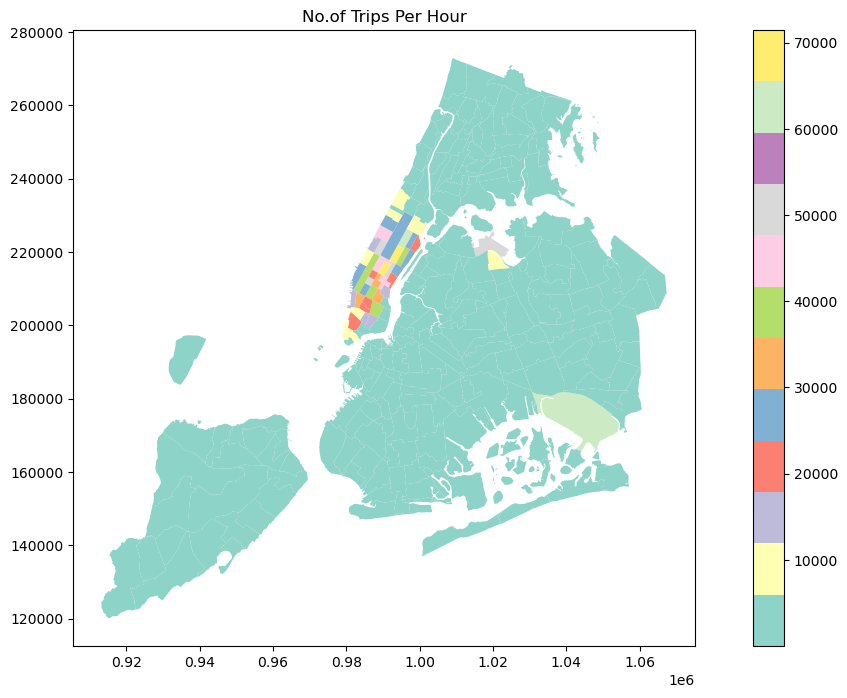

In [642]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_zones = zones.sort_values(by="no_of_trips",ascending=False)


 
fig, ax = plt.subplots(1, 1, figsize = (15, 8))

#Plot the map and display it

sorted_zones.plot(
   column = 'no_of_trips',
   ax = ax,
   legend = True,
    cmap='Set3'
   )

plt.title("No.of Trips Per Hour") 
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [87]:
# Find routes which have the slowest speeds at different times of the day

df_merged["trip_duration_seconds"] = df_merged["trip_duration"].dt.total_seconds()
df_merged["trip_speed"] = df_merged["trip_distance"]/(df_merged["trip_duration_seconds"]/3600)
df_merged.groupby("LocationID").agg({'trip_speed':'mean'}).sort_values('trip_speed').head(20) ## trip speed with 0 is skipped

## trip speed with 0 is skipped and below locationID's are considered
## five slowest routes comes out with locationID as 81,71,167,248,193

zones[zones["LocationID"].isin([81,71,167,248,193])]["zone"]



70      East Flatbush/Farragut
80                 Eastchester
166         Morrisania/Melrose
192    Queensbridge/Ravenswood
247     West Farms/Bronx River
Name: zone, dtype: object

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

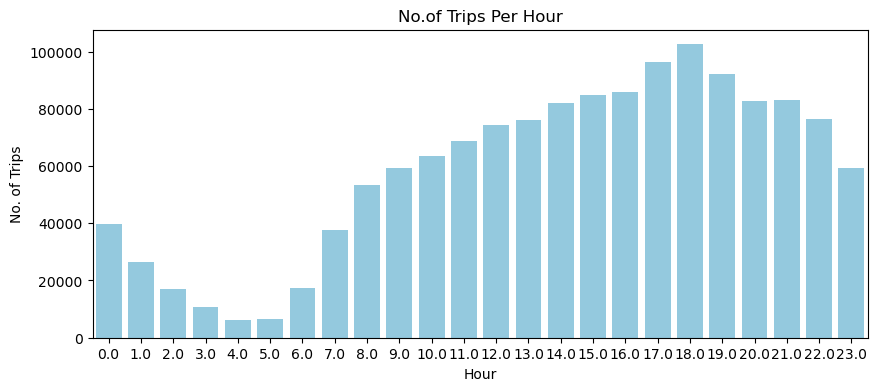

In [89]:
# Visualise the number of trips per hour and find the busiest hour

plt.figure(figsize=(10,4))
sns.countplot(x=df_merged["pickuphour"],color='skyblue')
plt.xlabel("Hour")
plt.ylabel("No. of Trips")
plt.title("No.of Trips Per Hour") 
plt.show()




Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [95]:
# Scale up the number of trips

df_trips_count = df_merged.groupby("pickuphour").size()
df_trips_count.sort_values(ascending=False).head()


pickuphour
18.0    102523
17.0     96352
19.0     92000
16.0     86024
15.0     84712
dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

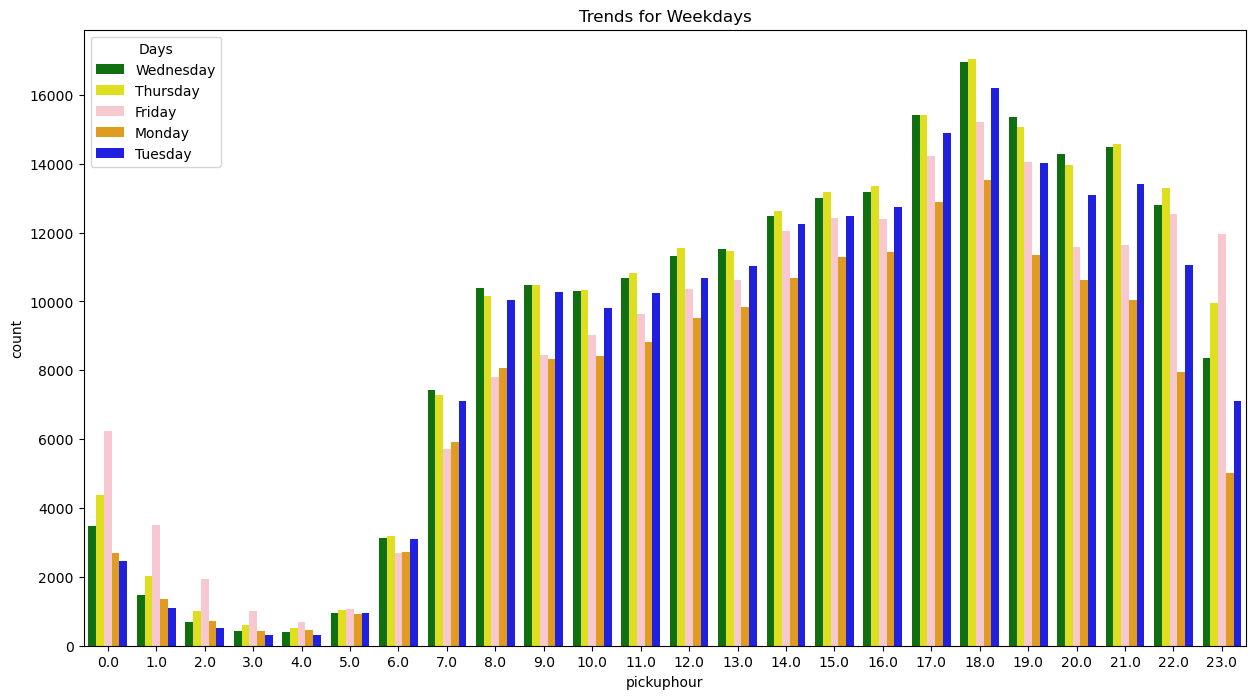

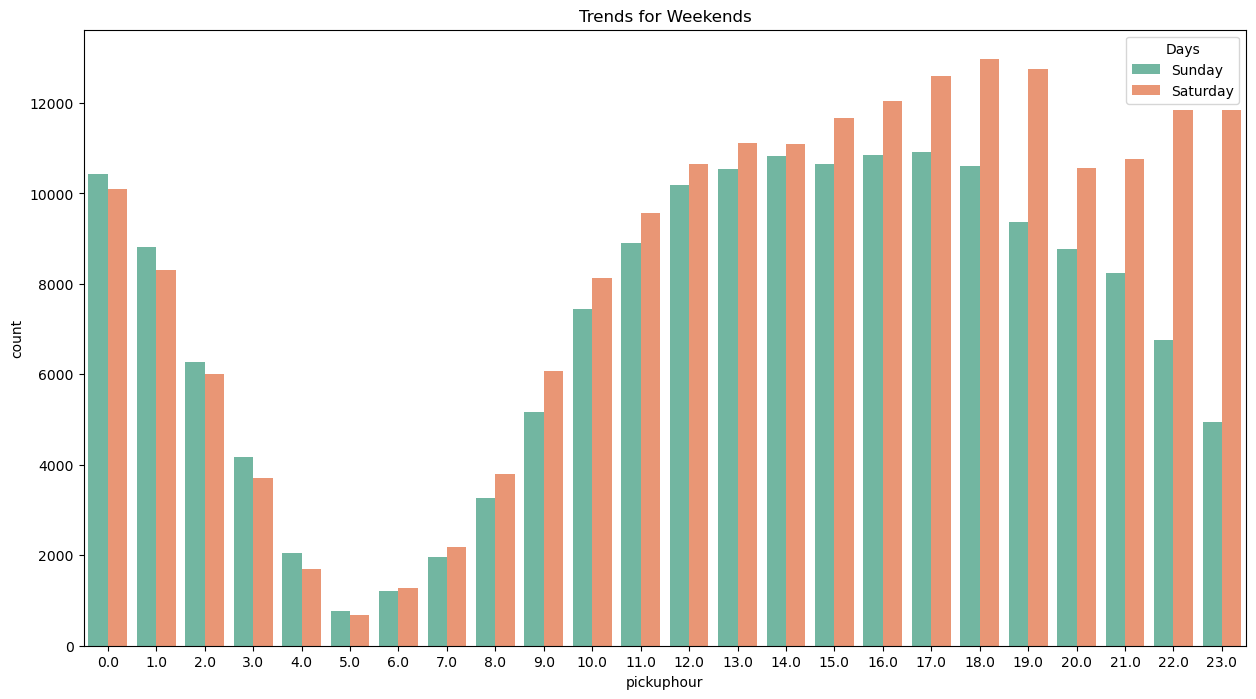

In [97]:
# Compare traffic trends for the week days and weekends
import calendar


plt.figure(figsize=(15,8))

df_traffic_pattern_weekdays = df_merged[df_merged["dayofweek"].isin([0,1,2,3,4])]
df_traffic_pattern_weekdays["Days"] = df_traffic_pattern_weekdays["dayofweek"].apply(lambda x: calendar.day_name[int(x)])
sns.countplot(x="pickuphour",hue="Days",data=df_traffic_pattern_weekdays,palette=["green","yellow","pink","orange","blue"])
plt.title("Trends for Weekdays")
plt.show()

plt.figure(figsize=(15,8))
df_traffic_pattern_weekends = df_merged[df_merged["dayofweek"].isin([5,6])]
df_traffic_pattern_weekends["Days"] = df_traffic_pattern_weekends["dayofweek"].apply(lambda x: calendar.day_name[int(x)])
sns.countplot(x="pickuphour",hue="Days",data=df_traffic_pattern_weekends,palette='Set2')
plt.title("Trends for Weekends")
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

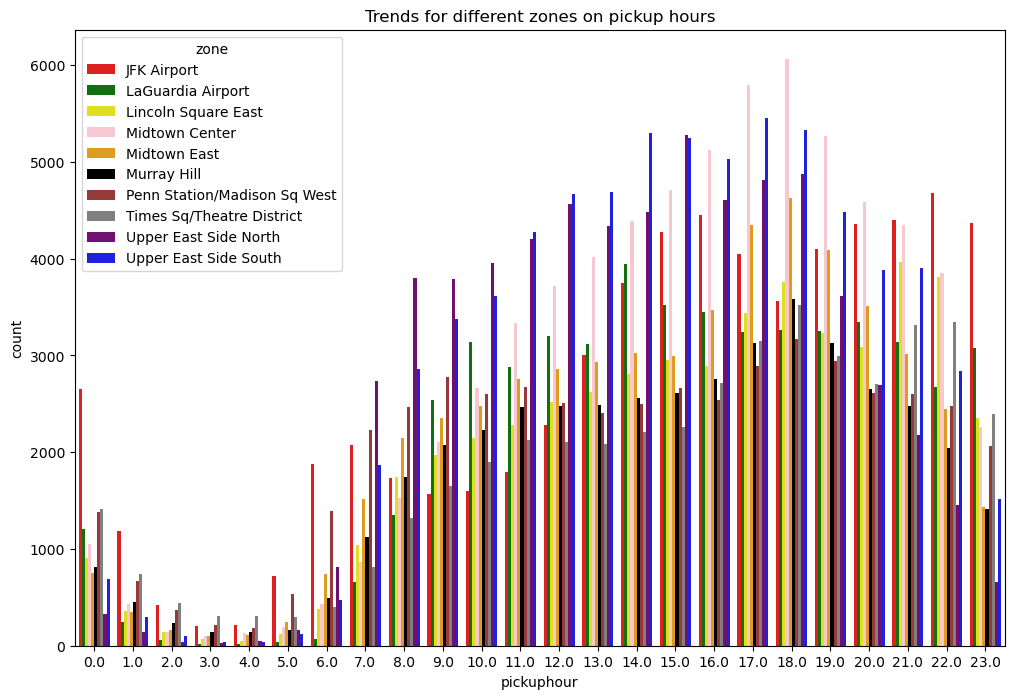

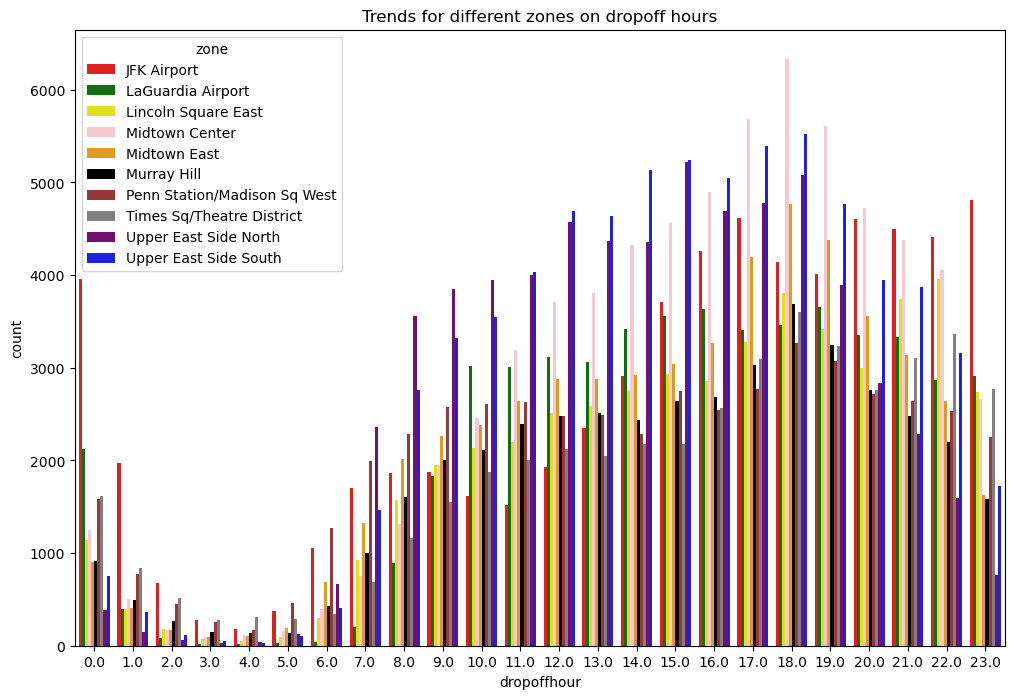

In [99]:
# Find top 10 pickup and dropoff zones


df_top_10_pickup_zone = df_merged.groupby("zone").agg({"pickuphour":'count'}).sort_values('pickuphour',ascending=False)
df_top_10_pickup_zone.reset_index().head(10)

df_top_10_dropoff_zone = df_merged.groupby("zone").agg({"dropoffhour":'count'}).sort_values('dropoffhour',ascending=False)
df_top_10_dropoff_zone.reset_index().head(10)

#df_merged.groupby("zone").agg({"pickuphour":'count'}).sort_values('pickuphour',ascending=False).head(10)
#df_merged
#df_merged.groupby("zone").agg({"dropoffhour":'count'}).sort_values('dropoffhour',ascending=False).head(10)

df_merged_top_10_pickup = df_merged[df_merged["zone"].isin(['Upper East Side South','Midtown Center','Upper East Side North','JFK Airport','Midtown East','LaGuardia Airport','Lincoln Square East','Penn Station/Madison Sq West','Times Sq/Theatre District','Murray Hill'])]

## Trends for pickup in top 10 zones

plt.figure(figsize=(12,8))
sns.countplot(x="pickuphour",hue="zone",data=df_merged_top_10_pickup,palette=["red", "green","yellow","pink","orange","black","brown","grey","purple","blue"])
plt.title("Trends for different zones on pickup hours")
plt.show()

## Trends for dropoff in top 10 zones

df_merged_top_10_dropoff = df_merged[df_merged["zone"].isin(['Upper East Side South','Midtown Center','Upper East Side North','JFK Airport','Midtown East','LaGuardia Airport','Lincoln Square East','Penn Station/Madison Sq West','Times Sq/Theatre District','Murray Hill'])]

plt.figure(figsize=(12,8))
sns.countplot(x="dropoffhour",hue="zone",data=df_merged_top_10_dropoff,palette=["red", "green","yellow","pink","orange","black","brown","grey","purple","blue"])
plt.title("Trends for different zones on dropoff hours")
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

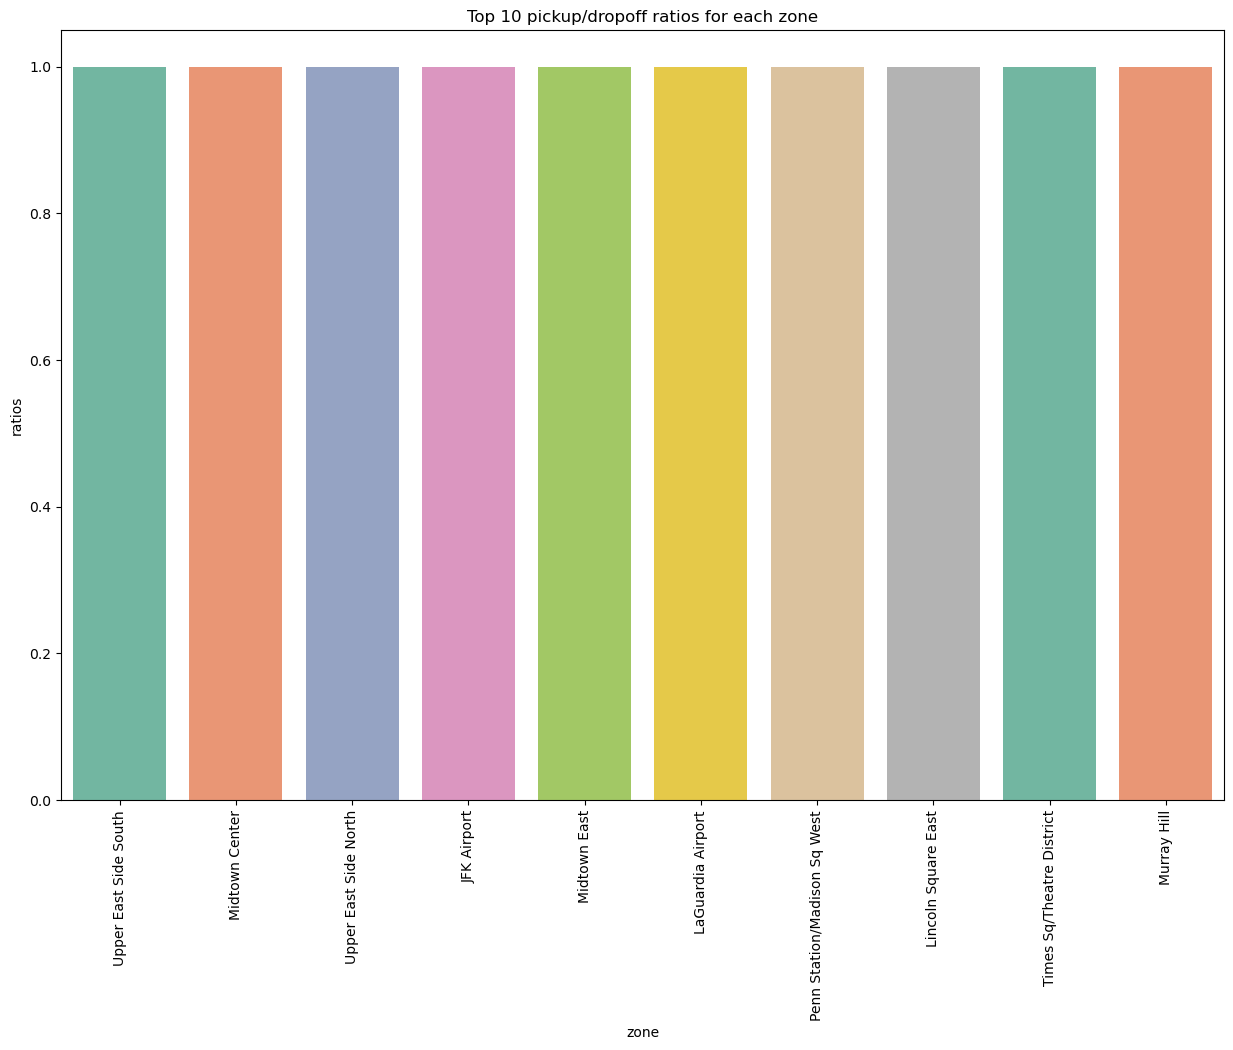

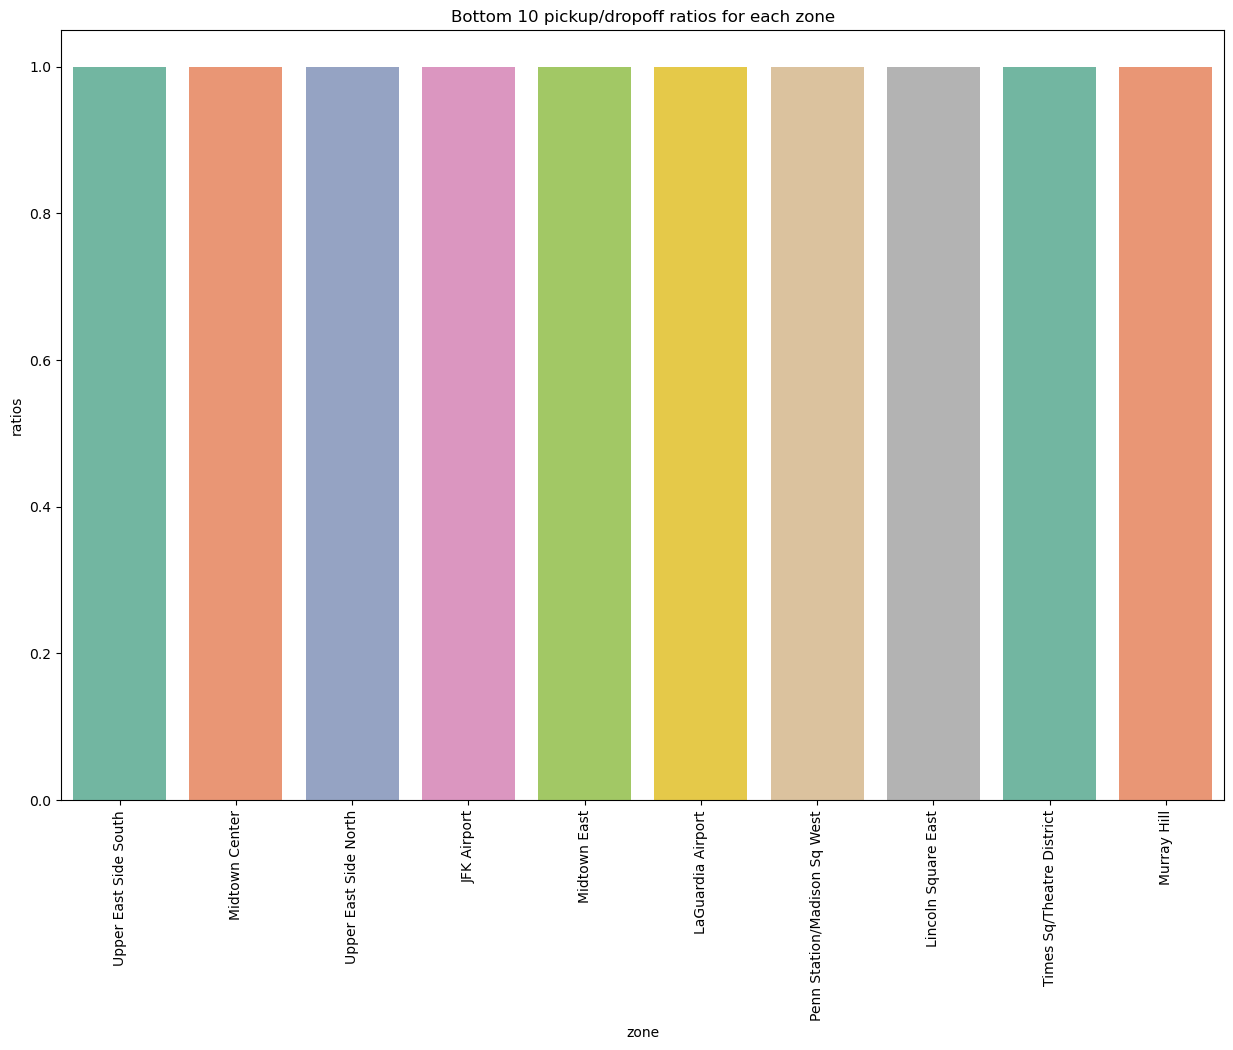

In [101]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

## Top 10 pickup/dropoff ratios
df_zone_pickup_dropoff_top_10 = df_merged.groupby("zone").agg({"dropoffhour":'count',"pickuphour":'count'}).sort_values(['pickuphour','dropoffhour'],ascending=False).head(10)
df_zone_pickup_dropoff_top_10["ratios"] = df_zone_pickup_dropoff_top_10["pickuphour"]/df_zone_pickup_dropoff_top_10["dropoffhour"]
df_zone_pickup_dropoff_top_10.reset_index(inplace=True)

plt.figure(figsize=(15,10))
sns.barplot(y="ratios",x="zone",data=df_zone_pickup_dropoff_top_10,palette='Set2')
plt.xticks(rotation=90)
plt.title("Top 10 pickup/dropoff ratios for each zone")
plt.show()

## Bottom 10 pickup/dropoff ratios
df_zone_pickup_dropoff_bottom_10 = df_merged.groupby("zone").agg({"dropoffhour":'count',"pickuphour":'count'}).sort_values(['pickuphour','dropoffhour'],ascending=False).tail(10)
df_zone_pickup_dropoff_bottom_10["ratios"] = df_zone_pickup_dropoff_bottom_10["pickuphour"]/df_zone_pickup_dropoff_bottom_10["dropoffhour"]
df_zone_pickup_dropoff_bottom_10.reset_index(inplace=True)

plt.figure(figsize=(15,10))
sns.barplot(y="ratios",x="zone",data=df_zone_pickup_dropoff_top_10,palette='Set2')
plt.xticks(rotation=90)
plt.title("Bottom 10 pickup/dropoff ratios for each zone")
plt.show()






**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [103]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

## Top 10 pickup zone during night
df_merged_pickups_night = df_merged[df_merged["pickuphour"].isin([23,0,1,2,3,4,5])]
df_merged_pickups_night.groupby("zone").agg({"pickuphour":'count'}).sort_values(['pickuphour'],ascending=False).head(10)


# Top 10 dropoff zone during night
df_merged_dropoff_night = df_merged[df_merged["dropoffhour"].isin([23,0,1,2,3,4,5])]
df_merged_dropoff_night.groupby("zone").agg({"dropoffhour":'count'}).sort_values(['dropoffhour'],ascending=False).head(10)


dropoffhour
zone                                     
East Village                        13624
JFK Airport                         12241
West Village                        11397
Clinton East                         8543
Lower East Side                      8331
Greenwich Village South              7854
Times Sq/Theatre District            6627
Penn Station/Madison Sq West         5956
LaGuardia Airport                    5578
Midtown South                        5230

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [105]:
# Filter for night hours (11 PM to 5 AM)
df_merged_pickups_night = df_merged[df_merged["pickuphour"].isin([23,0,1,2,3,4,5])]
df_merged_pickups_day = df_merged[~(df_merged["pickuphour"].isin([23,0,1,2,3,4,5]))]

df_merged_pickups_night["total_amount"].sum() * 100/df_merged["total_amount"].sum()
df_merged_pickups_day["total_amount"].sum()*100/df_merged["total_amount"].sum()

#87.85% of the revenue comes from daytime hours
#12.15 % of the revenue comes from nighttime hours


87.95382368670117

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [107]:
# Analyse the fare per mile per passenger for different passenger counts

df_avg_fare_passenger_grouped = df_merged.groupby("passenger_count").agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_passenger_grouped.reset_index()
df_avg_fare_passenger_grouped["fare_per_mile"] = df_avg_fare_passenger_grouped["total_amount"]/df_avg_fare_passenger_grouped["trip_distance"]
df_avg_fare_passenger_grouped.head(7)



total_amount  trip_distance  fare_per_mile
passenger_count                                            
1.0                 28.449405       3.198931       8.893409
2.0                 32.199057       3.924933       8.203721
3.0                 30.566942       3.551199       8.607499
4.0                 33.249579       3.837397       8.664617
5.0                 28.517973       3.258994       8.750544
6.0                 28.530754       3.264073       8.740844
7.0                 87.125000       8.400000      10.372024

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

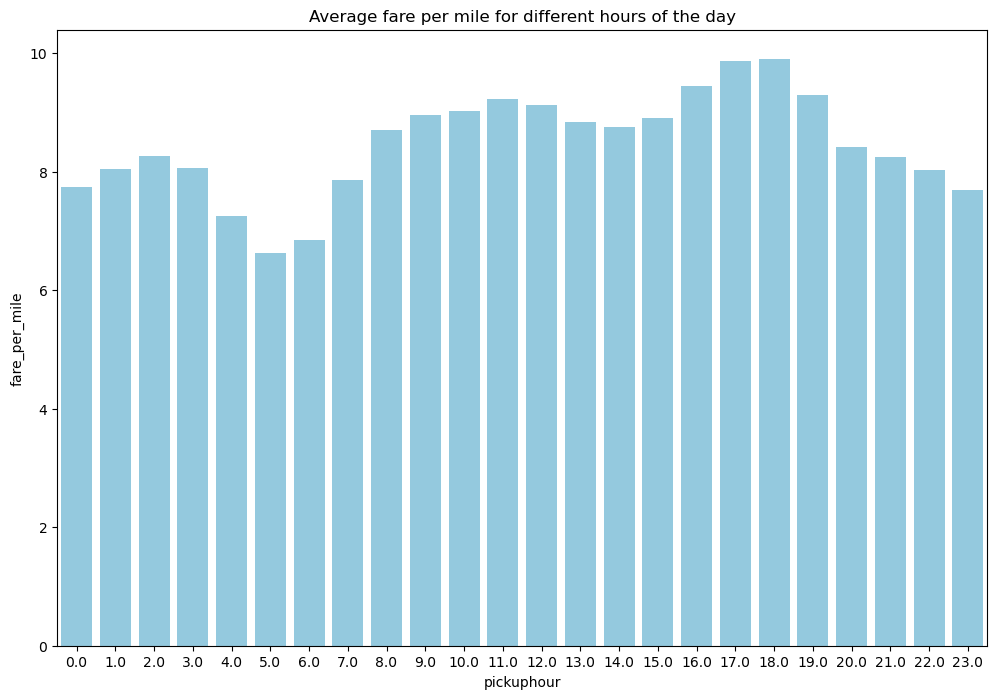

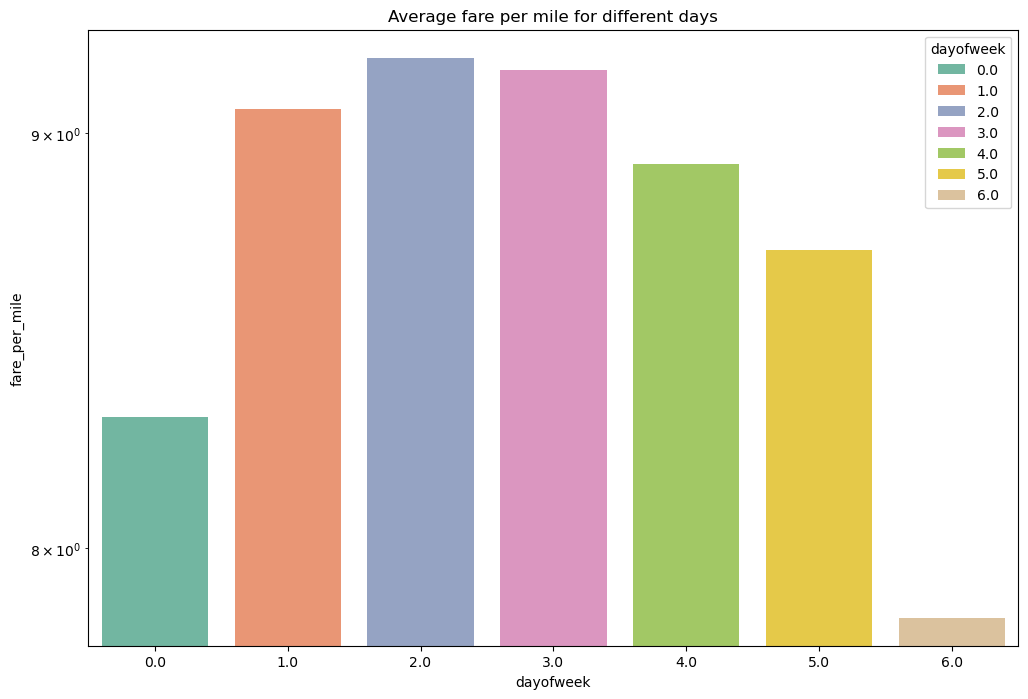

In [109]:
# Compare the average fare per mile for different days and for different times of the day

df_avg_fare_by_hours = df_merged.groupby("pickuphour").agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_hours.reset_index()
df_avg_fare_by_hours["fare_per_mile"] = df_avg_fare_by_hours["total_amount"] / df_avg_fare_by_hours["trip_distance"]
df_avg_fare_by_hours.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(y="fare_per_mile",x="pickuphour",data=df_avg_fare_by_hours,color='skyblue')
plt.title("Average fare per mile for different hours of the day")
plt.show()


df_avg_fare_by_days = df_merged.groupby("dayofweek").agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_days.reset_index()
df_avg_fare_by_days["fare_per_mile"] = df_avg_fare_by_days["total_amount"] / df_avg_fare_by_days["trip_distance"]
df_avg_fare_by_days

plt.figure(figsize=(12,8))
g = sns.barplot(y="fare_per_mile",x="dayofweek",data=df_avg_fare_by_days,palette='Set2',hue="dayofweek")
g.set_yscale("log")
plt.title("Average fare per mile for different days")
plt.show()



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

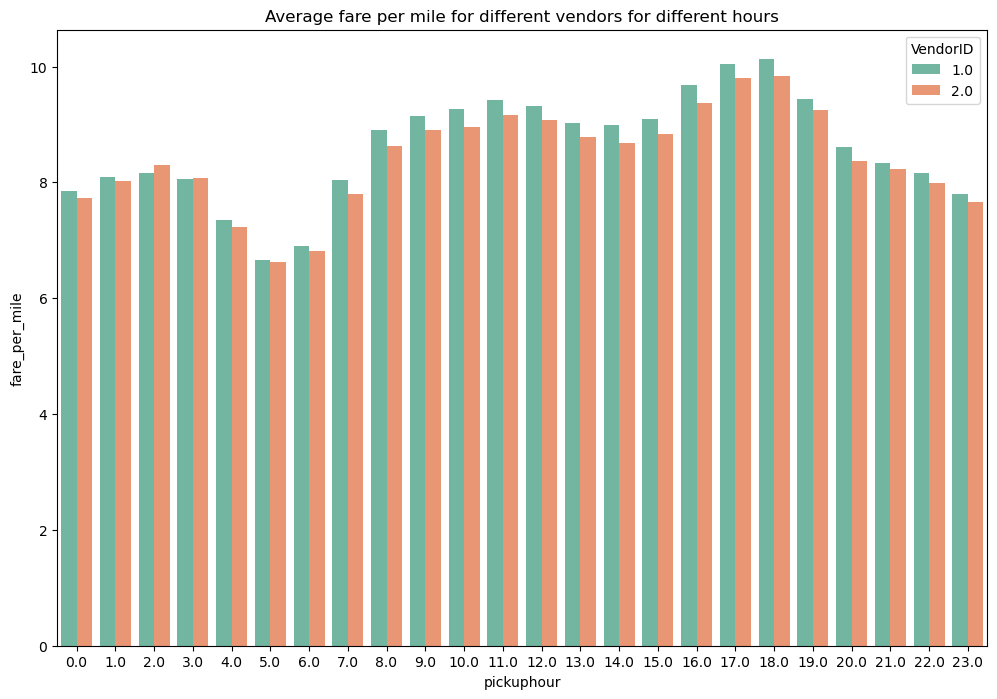

In [111]:
# Compare fare per mile for different vendors
df_avg_fare_by_vendor = df_merged.groupby(["VendorID","pickuphour"]).agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_vendor.reset_index()
df_avg_fare_by_vendor["fare_per_mile"] = df_avg_fare_by_vendor["total_amount"] / df_avg_fare_by_vendor["trip_distance"]
df_avg_fare_by_vendor.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(y="fare_per_mile",x="pickuphour",data=df_avg_fare_by_vendor,hue='VendorID',palette='Set2')
plt.title("Average fare per mile for different vendors for different hours")
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


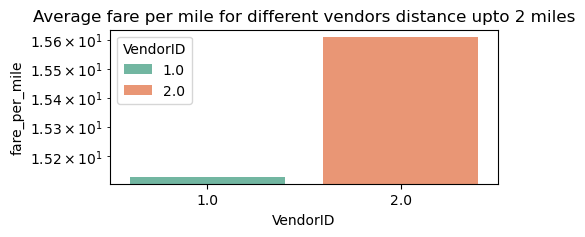

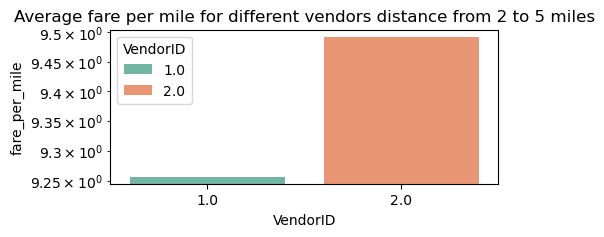

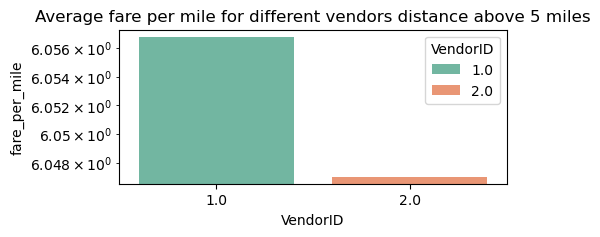

In [113]:
# Defining distance tiers

## filter the data with distance <= 2 miles

df_merged_2_miles = df_merged[df_merged["trip_distance"] <= 2]

df_avg_fare_by_vendor_2_miles = df_merged_2_miles.groupby(["VendorID"]).agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_vendor_2_miles.reset_index()
df_avg_fare_by_vendor_2_miles["fare_per_mile"] = df_avg_fare_by_vendor_2_miles["total_amount"] / df_avg_fare_by_vendor_2_miles["trip_distance"]
df_avg_fare_by_vendor_2_miles.reset_index()

plt.figure(figsize=(5,2))
g=sns.barplot(y="fare_per_mile",x="VendorID",data=df_avg_fare_by_vendor_2_miles,hue='VendorID',palette='Set2')
g.set_yscale("log")
plt.title("Average fare per mile for different vendors distance upto 2 miles")
plt.show()

## filter the data with distances 2<=5

df_merged_5_miles = df_merged[(df_merged["trip_distance"] > 2) & (df_merged["trip_distance"] <=5)]
df_avg_fare_by_vendor_5_miles = df_merged_5_miles.groupby(["VendorID"]).agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_vendor_5_miles.reset_index()
df_avg_fare_by_vendor_5_miles["fare_per_mile"] = df_avg_fare_by_vendor_5_miles["total_amount"] / df_avg_fare_by_vendor_5_miles["trip_distance"]
df_avg_fare_by_vendor_5_miles.reset_index()


plt.figure(figsize=(5,2))
g=sns.barplot(y="fare_per_mile",x="VendorID",data=df_avg_fare_by_vendor_5_miles,hue='VendorID',palette='Set2')
g.set_yscale("log")
plt.title("Average fare per mile for different vendors distance from 2 to 5 miles")
plt.show()

## filter the data with distances above 5
df_merged_above_5 = df_merged[(df_merged["trip_distance"] > 5)]
df_avg_fare_by_vendor_above_5 = df_merged_above_5.groupby(["VendorID"]).agg({"total_amount":'mean',"trip_distance":'mean'})
df_avg_fare_by_vendor_above_5.reset_index()
df_avg_fare_by_vendor_above_5["fare_per_mile"] = df_avg_fare_by_vendor_above_5["total_amount"] / df_avg_fare_by_vendor_above_5["trip_distance"]
df_avg_fare_by_vendor_above_5.reset_index()


plt.figure(figsize=(5,2))
g=sns.barplot(y="fare_per_mile",x="VendorID",data=df_avg_fare_by_vendor_above_5,hue='VendorID',palette='Set2')
g.set_yscale("log")
plt.title("Average fare per mile for different vendors distance above 5 miles")
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

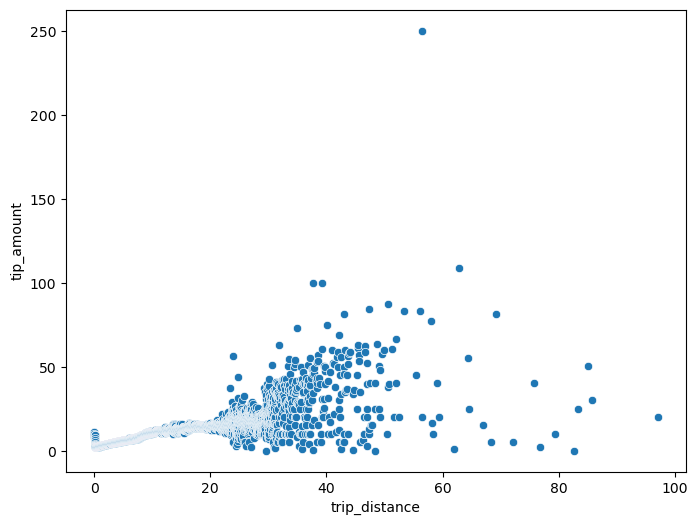

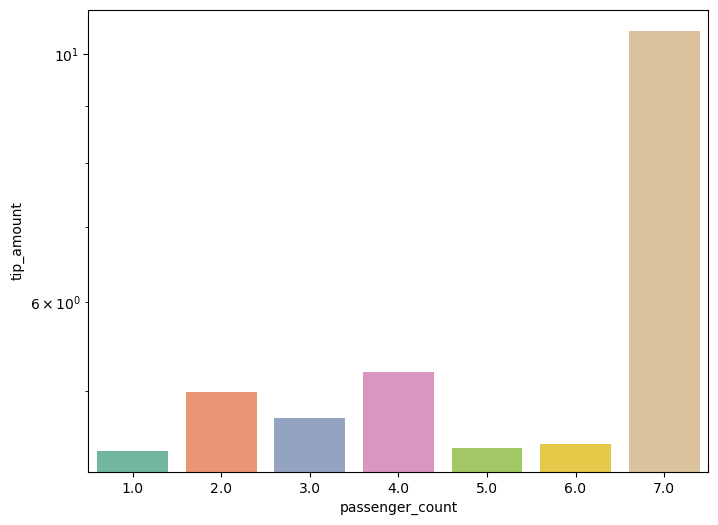

In [115]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_merged_tip_trip_distance = df_merged.groupby("trip_distance").agg({'tip_amount':'mean'}) 
df_merged_tip_trip_distance.reset_index()

plt.figure(figsize=(8,6))
sns.scatterplot(y="tip_amount",x="trip_distance",data=df_merged_tip_trip_distance)
plt.show()

df_merged_tip_passenger_count = df_merged.groupby("passenger_count").agg({'tip_amount':'mean'}) 
df_merged_tip_passenger_count.reset_index()

plt.figure(figsize=(8,6))
g=sns.barplot(y="tip_amount",x="passenger_count",data=df_merged_tip_passenger_count,palette="Set2")
g.set_yscale("log")
plt.show()

df_merged_tip_pickuptime = df_merged.groupby("pickuphour").agg({'tip_amount':'mean'}) 
df_merged_tip_pickuptime.reset_index()

plt.figure(figsize=(8,6))
g=sns.barplot(y="tip_amount",x="pickuphour",data=df_merged_tip_pickuptime,color='skyblue')
g.set_yscale("log")
plt.xticks(rotation=90)
plt.show()



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

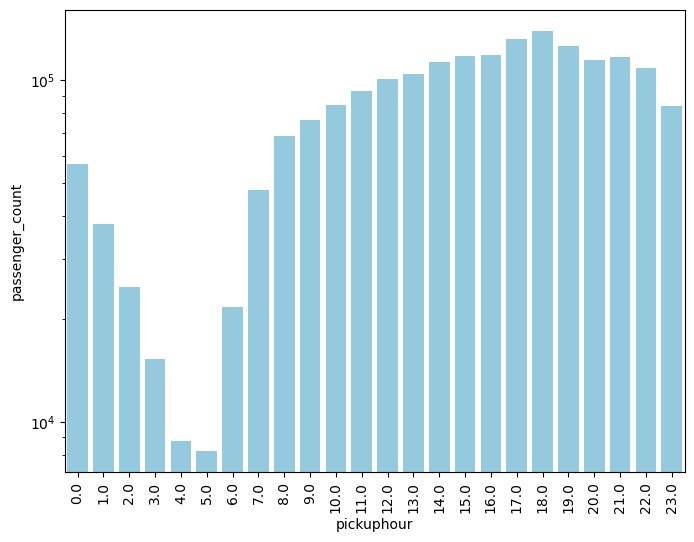

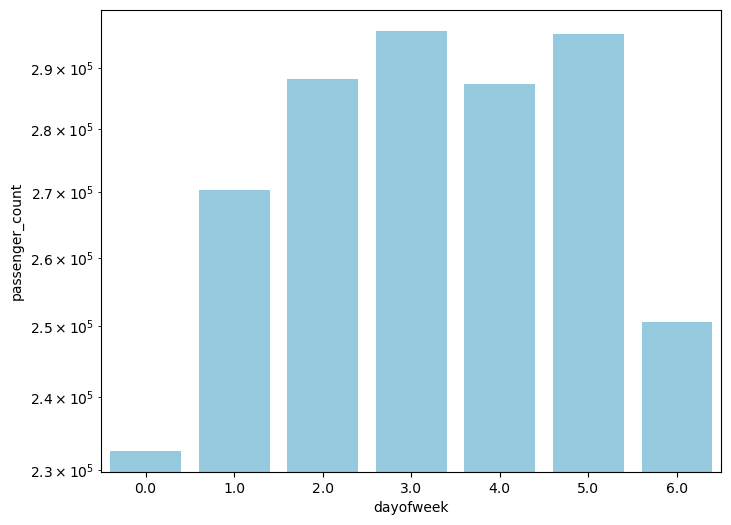

In [117]:
# See how passenger count varies across hours and days

df_merged_hour_passenger_count = df_merged.groupby("pickuphour").agg({'passenger_count':'sum'}) 
df_merged_hour_passenger_count.reset_index()

plt.figure(figsize=(8,6))
g=sns.barplot(y="passenger_count",x="pickuphour",data=df_merged_hour_passenger_count,color='skyblue')
g.set_yscale("log")
plt.xticks(rotation=90)
plt.show()


df_merged_day_passenger_count = df_merged.groupby("dayofweek").agg({'passenger_count':'sum'}) 
df_merged_day_passenger_count.reset_index()

plt.figure(figsize=(8,6))
g=sns.barplot(y="passenger_count",x="dayofweek",data=df_merged_day_passenger_count,color='skyblue')
g.set_yscale("log")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

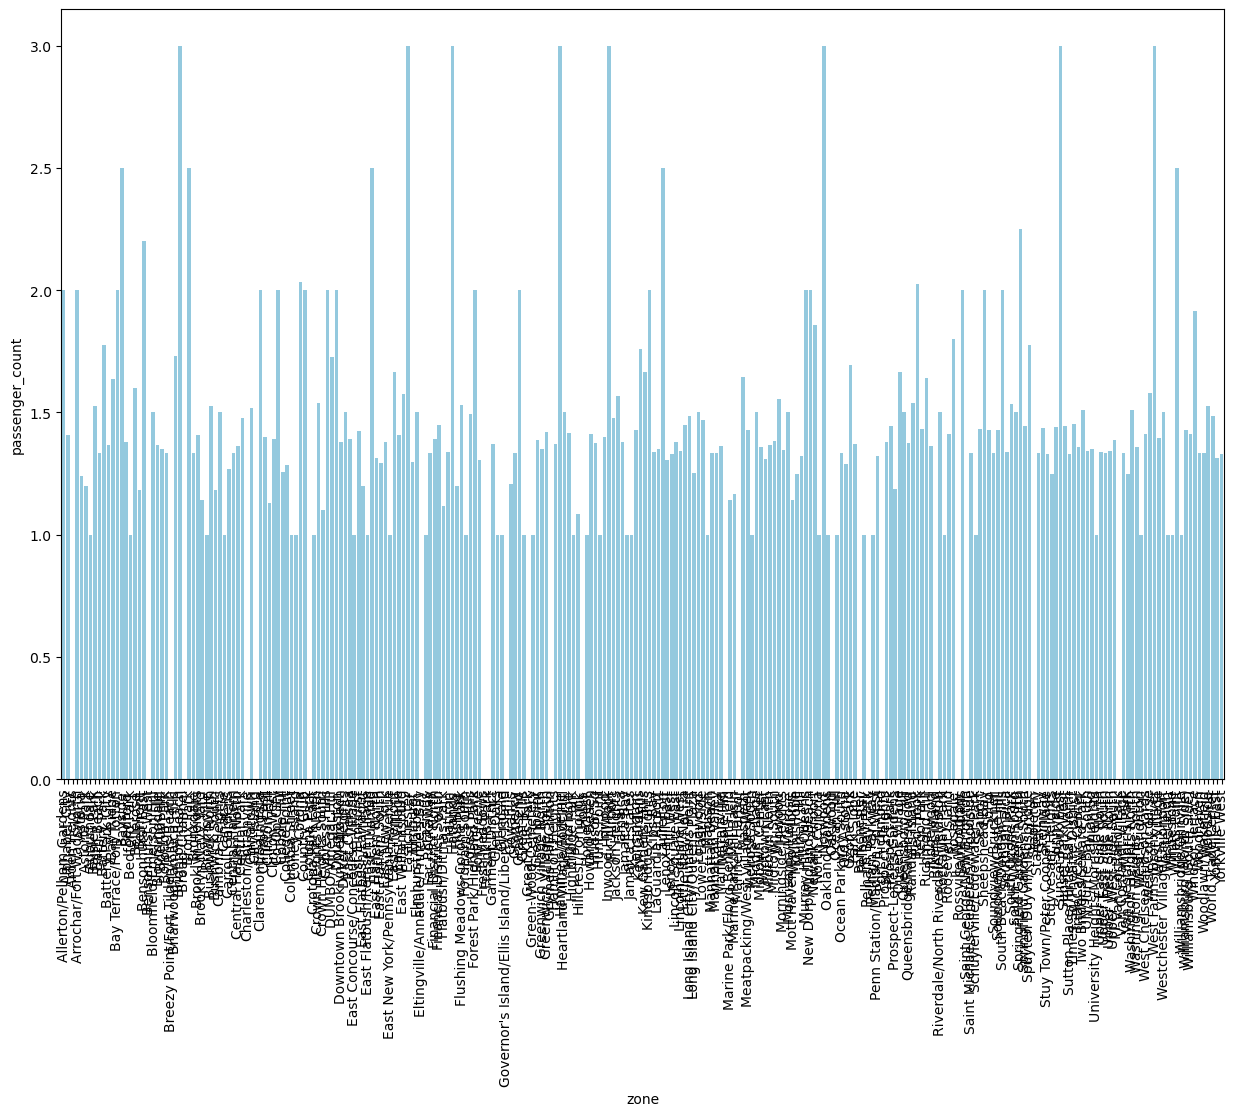

In [119]:
# How does passenger count vary across zones
df_merged_zones_passenger_count = df_merged.groupby("zone").agg({'passenger_count':'mean'}) 
df_merged_zones_passenger_count.reset_index()

plt.figure(figsize=(15,10))
g=sns.barplot(y="passenger_count",x="zone",data=df_merged_zones_passenger_count,color='skyblue')
plt.xticks(rotation = 90)
#g.set_yscale("log")
plt.show()


In [121]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df_zone_avg_passenger = df_merged.groupby("LocationID").agg({'passenger_count':'mean'})
df_zone_avg_passenger.reset_index(inplace=True)

passenger_counts = []

for i, loc_z in zones["LocationID"].items():
    for index, row in df_zone_avg_passenger.iterrows():
        if(loc_z == row["LocationID"]):
           passenger_counts.append(row["passenger_count"])
zones["passenger_count"] = passenger_counts
zones

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Plot the map and display it

zones.plot(
    column = 'passenger_count',
    ax = ax,
    legend = True,
    cmap='Set3',
    legend_kwds = {'label': "Variation of average passenger count for different zones", 'orientation': "horizontal"}
   )
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

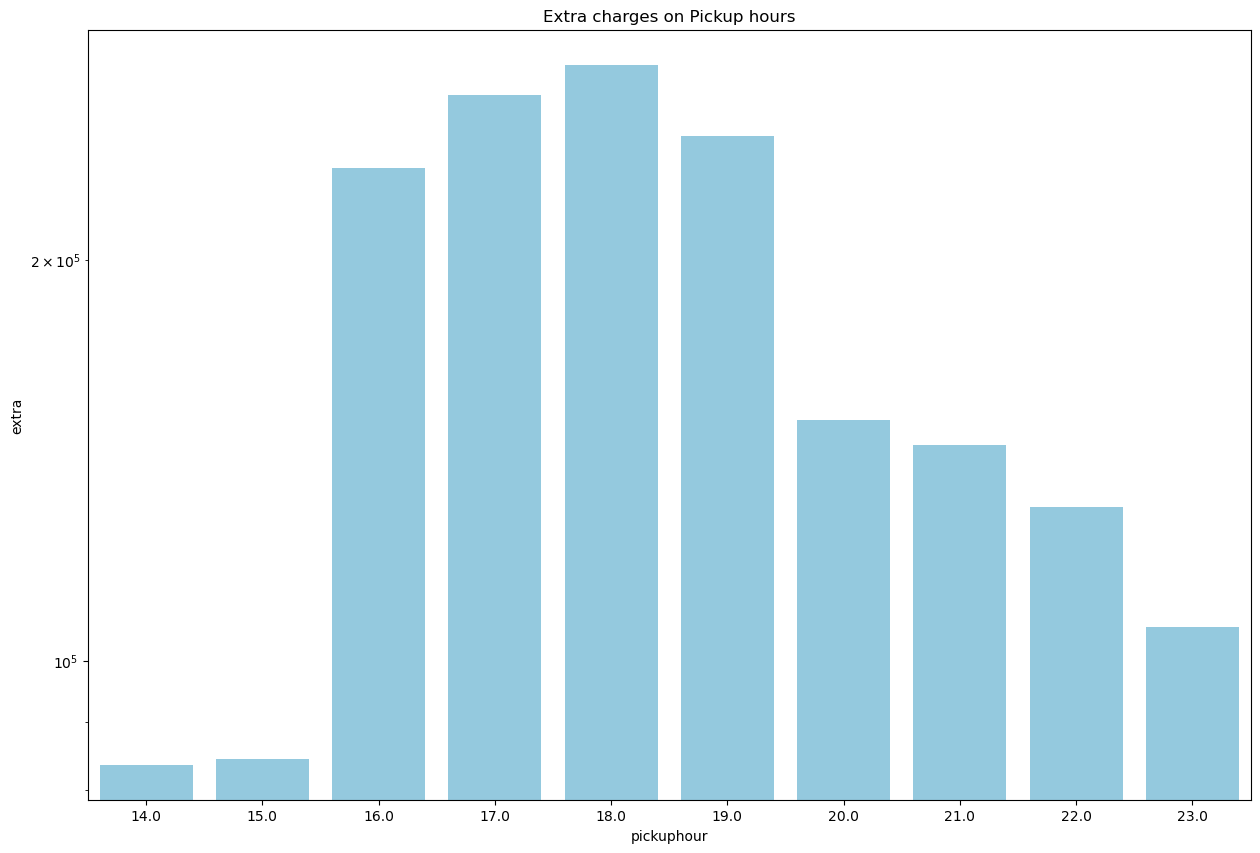

In [123]:
# How often is each surcharge applied?
df_merged_extra_hour = df_merged.groupby("pickuphour").agg({'extra':'sum'}).sort_values('extra',ascending=False).head(10)
df_merged_extra_hour.reset_index(inplace=True)

plt.figure(figsize=(15,10))
g=sns.barplot(y="extra",x="pickuphour",data=df_merged_extra_hour,color='skyblue')
plt.title("Extra charges on Pickup hours")
g.set_yscale("log")
plt.show()



df_merged_surcharge_hour = df_merged.groupby("pickuphour").agg({'congestion_surcharge':'count'}).sort_values('congestion_surcharge',ascending=False).head(10)
df_merged_surcharge_hour

plt.figure(figsize=(15,10))
g=sns.barplot(y="congestion_surcharge",x="pickuphour",data=df_merged_surcharge_hour,color='skyblue')
plt.title("Congestion Surcharge on Pickup hours")
g.set_yscale("log")
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
Mostly taxies need to be more on weekdays compared to weekends with specifically more on Wednesday and Thrusdays of weekdays.
           
Mostly more availability need to be in late afternoon and early evening  
Reduce taxi operations during weekends and late night or early morning hours

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
Increase the number of taxis in East Village, JFK Airport, and West Village due to their higher demand compared 
to other region between 11 PM to 5 AM

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
In late nights and morning hours offer discounts and low prices during periods of   
low demand, to attract more customers.